In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
%matplotlib inline
from shapely.geometry import Point
from shapely.geometry import Polygon

# GROUP ONE: You'll just need to plot, you won't need to join or do much analysis

##  (1) Make a map of power plants in the US, color coded by type

In [2]:
ls 

Boundaries - Census Tracts - 2010/
Classwork Chicago Food Deserts.ipynb
Grocery_Stores_-_2013.csv
Homework 14 - GROUP 1 - Solutions.ipynb
Homework 14.ipynb
Total Carbon Dioxide Emissions-StateRankings.csv
annual_conc_by_monitor_2017.csv
cb_2016_us_state_500k/
pm25_annual.csv
powerplants.csv


In [3]:
states = gpd.read_file("cb_2016_us_state_500k/cb_2016_us_state_500k.shp")

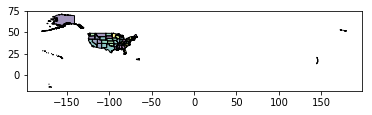

In [4]:
states.plot()

In [5]:
#We're going to limit our map to just the continental USA
states.sort_values(by="STATEFP")

AFFGEOID          ALAND        AWATER GEOID LSAD  \
0   0400000US01   131173688951    4593686489    01   00   
1   0400000US02  1477946266785  245390495931    02   00   
2   0400000US04   294198560125    1027346486    04   00   
3   0400000US05   134771517596    2960191698    05   00   
4   0400000US06   403501101370   20466718403    06   00   
5   0400000US08   268429343790    1175112870    08   00   
6   0400000US09    12542638347    1815476291    09   00   
7   0400000US10     5047194742    1398720828    10   00   
8   0400000US11      158364992      18633403    11   00   
34  0400000US12   138924199212   31386038155    12   00   
9   0400000US13   149169848456    4741100880    13   00   
10  0400000US15    16634100855   11777698394    15   00   
11  0400000US16   214042908012    2398669593    16   00   
12  0400000US17   143788697679    6206693598    17   00   
13  0400000US18    92790545247    1536767065    18   00   
14  0400000US19   144667643793    1077808017    19   00   
15  0400000US20   211753253104    1346235678    20   00   
35  0400000US21   102266279759    2388770991    21   00   
36  0400000US22   111904912452   23746303848    22   00   
37  0400000US23    79885221885   11748755195    23   00   
16  0400000US24    25147754905    6983312282    24   00   
38  0400000US25    20204442852    7130620748    25   00   
39  0400000US26   146455251245  104031574060    26   00   
17  0400000US27   206232257655   18929176411    27   00   
18  0400000US28   121529933533    3930505829    28   00   
40  0400000US29   178052653610    2487575477    29   00   
19  0400000US30   376964956503    3866986696    30   00   
41  0400000US31   198972706218    1356290940    31   00   
20  0400000US32   284329326845    2047350887    32   00   
42  0400000US33    23187396994    1028678842    33   00   
21  0400000US34    19050755048    3541927612    34   00   
22  0400000US35   314169362533     755722962    35   00   
43  0400000US36   122053048985   19243095591    36   00   
44  0400000US37   125921301190   13470062955    37   00   
23  0400000US38   178711813026    4399093501    38   00   
45  0400000US39   105833122995   10264595056    39   00   
24  0400000US40   177663722167    3373836066    40   00   
46  0400000US41   248604268242    6195105690    41   00   
25  0400000US42   115882226263    3396805575    42   00   
47  0400000US44     2677898725    1323551636    44   00   
26  0400000US45    77861720871    5070943755    45   00   
27  0400000US46   196348407642    3380782733    46   00   
48  0400000US47   106797662267    2355188876    47   00   
49  0400000US48   676633459408   19025991684    48   00   
28  0400000US49   212885517115    6999529104    49   00   
29  0400000US50    23873467535    1031124865    50   00   
50  0400000US51   102257320053    8528605825    51   00   
51  0400000US53   172113416541   12558451099    53   00   
30  0400000US54    62265597146     489902816    54   00   
52  0400000US55   140273604537   29361386480    55   00   
31  0400000US56   251464935120    1861273298    56   00   
32  0400000US60      197759069    1307243753    60   00   
53  0400000US66      543558310     934334983    66   00   
54  0400000US69      472276664    4644268325    69   00   
33  0400000US72     8868100460    4923178155    72   00   
55  0400000US78      348013113    1550244955    78   00   

                                            NAME STATEFP   STATENS STUSPS  \
0                                        Alabama      01  01779775     AL   
1                                         Alaska      02  01785533     AK   
2                                        Arizona      04  01779777     AZ   
3                                       Arkansas      05  00068085     AR   
4                                     California      06  01779778     CA   
5                                       Colorado      08  01779779     CO   
6                                    Connecticut      09  01779780     CT   
7                          

In [6]:
# Get rid of Guam, Mariana Islands and Virgin Islands
states = states[states.STATEFP.astype(int) < 60]

# Get rid of Hawaii and Alaska
states = states[~states.NAME.isin(['Hawaii', 'Alaska'])]

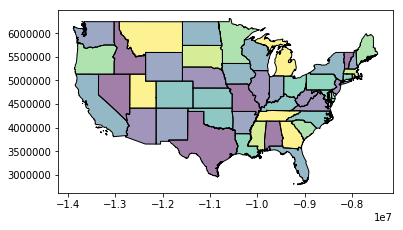

In [7]:
states.to_crs({"proj": "merc"}).plot()

In [8]:
powerplants_df = pd.read_csv("powerplants.csv")
powerplants_df[:2]

Plant_Code    Plant_Name        Utility_Na  Utility_ID        sector_nam  \
0           2  Bankhead Dam  Alabama Power Co         195  Electric Utility   
1           3         Barry  Alabama Power Co         195  Electric Utility   

        City      County    Zip          Street_Add     PrimSource    ...      \
0  Northport  Tuscaloosa  35476  19001 Lock 17 Road  hydroelectric    ...       
1      Bucks      Mobile  36512    North Highway 43           coal    ...       

   Solar_MW  Wind_MW  Geo_MW  Other_MW  \
0       0.0      0.0     NaN       NaN   
1       0.0      0.0     NaN       NaN   

                                source_des  \
0                    Hydroelectric = 56 MW   
1  Coal = 1088.5 MW, Natural Gas = 1072 MW   

                                           tech_desc  \
0                         Conventional Hydroelectric   
1  Conventional Steam Coal; Natural Gas Fired Com...   

                          Source  Period   Latitude  Longitude  
0  EIA-860, EIA-860M and EIA-923  201607  33.458665 -87.356823  
1  EIA-860, EIA-860M and EIA-923  201607  31.006900 -88.010300  

[2 rows x 28 columns]

In [9]:
points = powerplants_df.apply(lambda row: Point(row.Longitude, row.Latitude),axis=1)
powerplants = gpd.GeoDataFrame(powerplants_df, geometry=points)
powerplants.crs = {'init': 'epsg:4326'}
powerplants.to_crs(states.crs, inplace=True)

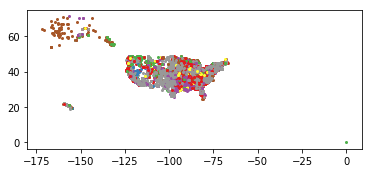

In [10]:
powerplants.plot(column="PrimSource")

In [11]:
#Using geojson.io, create bounds to map just the continental USA

bounds = [
    [
            -130.078125,
            49.15296965617042
          ],
          [
            -55.54687499999999,
            47.27922900257082
          ],
          [
            -79.453125,
            24.206889622398023
          ],
          [
            -122.6953125,
            26.115985925333536
          ],
          [
            -133.2421875,
            49.15296965617042
          ]    
]

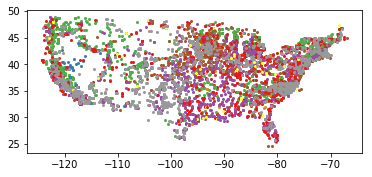

In [12]:
continental_box = Polygon(bounds)
powerplants = powerplants[powerplants.within(continental_box)]
powerplants.plot(column="PrimSource")

(-127.65372665000001,
 -64.059236349999992,
 23.280032899999998,
 50.627421099999999)

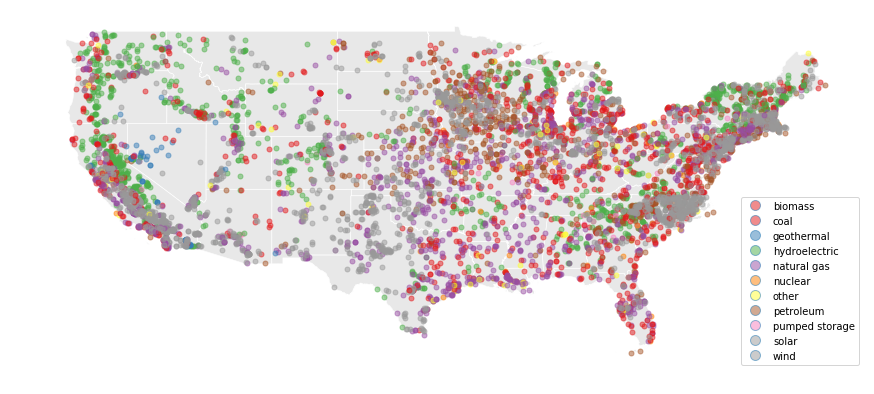

In [13]:
ax = states.plot(color="lightgrey",edgecolor="white", linewidth=0.5, figsize=(15,10))
powerplants.plot(ax=ax, column="PrimSource", markersize=5, alpha=0.5, legend=True)
ax.axis("off")

## (2) Make a map of air quality stations, color coded by average air quality

In [14]:
pd.set_option("display.max_columns",100)
pm_df = pd.read_csv("pm25_annual.csv")
pm_df.head(2)

State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1            3        10           88101    1  30.497478   
1           1           27         1           88101    1  33.284928   

   Longitude  Datum            Parameter Name Sample Duration  \
0 -87.880258  NAD83  PM2.5 - Local Conditions         24 HOUR   
1 -85.803608  NAD83  PM2.5 - Local Conditions         24 HOUR   

  Pollutant Standard Metric Used  \
0  PM25 24-hour 2012  Daily Mean   
1  PM25 24-hour 2012  Daily Mean   

                                         Method Name  Year  \
0  R & P Model 2025 PM-2.5 Sequential Air Sampler...  2017   
1  R & P Model 2025 PM-2.5 Sequential Air Sampler...  2017   

              Units of Measure Event Type  Observation Count  \
0  Micrograms/cubic meter (LC)  No Events                 28   
1  Micrograms/cubic meter (LC)  No Events                 27   

   Observation Percent Completeness Indicator  Valid Day Count  \
0                   23                      N               28   
1                   22                      N               27   

   Required Day Count  Exceptional Data Count  Null Data Count  \
0                 122                       0                2   
1                 122                       0                5   

   Primary Exceedance Count  Secondary Exceedance Count  \
0                       0.0                         0.0   
1                       0.0                         0.0   

      Certification Indicator  Num Obs Below MDL  Arithmetic Mean  \
0  Certification not required                  0         6.535714   
1  Certification not required                  0         8.851852   

   Arithmetic Standard Dev  1st Max Value  1st Max DateTime  2nd Max Value  \
0                 2.802012           15.4  2017-03-23 00:00           11.9   
1                 4.694708           19.0  2017-03-17 00:00           17.4   

   2nd Max DateTime  3rd Max Value  3rd Max DateTime  4th Max Value  \
0  2017-03-20 00:00           10.5  2017-03-05 00:00            9.2   
1  2017-02-18 00:00           16.3  2017-02-21 00:00           15.0   

   4th Max DateTime  1st Max Non Overlapping Value  1st NO Max DateTime  \
0  2017-03-11 00:00                            NaN                  NaN   
1  2017-03-20 00:00                            NaN                  NaN   

   2nd Max Non Overlapping Value  2nd NO Max DateTime  99th Percentile  \
0                            NaN                  NaN             15.4   
1                            NaN                  NaN             19.0   

   98th Percentile  95th Percentile  90th Percentile  75th Percentile  \
0             15.4             11.9             10.5              8.0   
1             19.0             17.4             16.3             12.4   

   50th Percentile  10th Percentile    Local Site Name  \
0              5.7              3.8  FAIRHOPE, Alabama   
1              8.7              2.9            ASHLAND   

                                             Address State Name County Name  \
0  FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...    Alabama     Baldwin   
1                                    ASHLAND AIRPORT    Alabama        Clay   

  City Name                  CBSA Name Date of Last Change  
0  Fairhope  Daphne-Fairhope-Foley, AL          2017-05-18  
1   Ashland                        NaN          2017-05-18

In [15]:
points = pm_df.apply(lambda row: Point(row.Longitude, row.Latitude),axis=1)
air = gpd.GeoDataFrame(pm_df, geometry=points)
air.crs = {'init': 'epsg:4326'}
air.to_crs(states.crs, inplace=True)

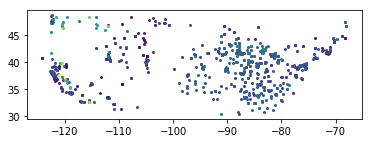

In [16]:
air = air[air.within(continental_box)]
air.plot(column="Arithmetic Mean")

(-127.65372665000001,
 -64.059236349999992,
 23.280032899999998,
 50.627421099999999)

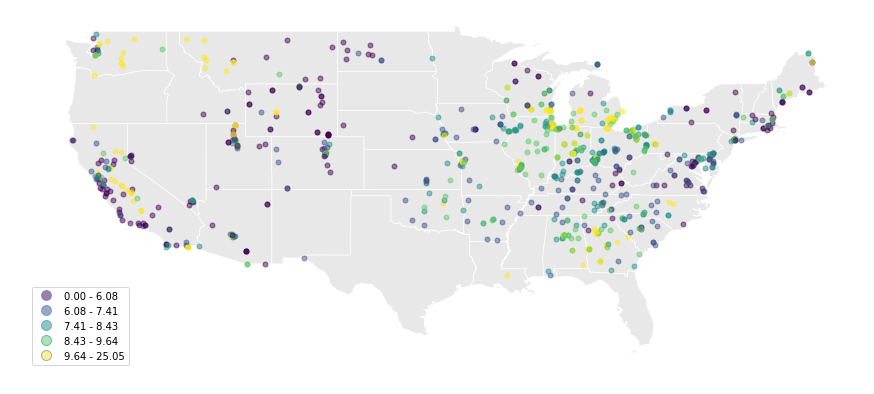

In [17]:
ax = states.plot(color="lightgrey",edgecolor="white", linewidth=0.5, figsize=(15,10))
air.plot(ax=ax, column="Arithmetic Mean", markersize=5, alpha=0.5, scheme='quantiles', legend=True)
ax.axis("off")

## (4) Map the power plants owned by the top 5 most common energy companies as red. Map the rest of the plants as dark grey.

In [18]:
#get the top 5 companies
powerplants["Utility_Na"].value_counts().head(5)

Pacific Gas & Electric Co        82
Erie Boulevard Hydropower LP     71
Sustainable Power Group, LLC     63
Southern California Edison Co    62
PacifiCorp                       59
Name: Utility_Na, dtype: int64

In [19]:
#turn the top 5 companies into a list of companies
companies = powerplants["Utility_Na"].value_counts().head(5).reset_index()["index"].tolist()
companies

['Pacific Gas & Electric Co',
 'Erie Boulevard Hydropower LP',
 'Sustainable Power Group, LLC',
 'Southern California Edison Co',
 'PacifiCorp']

(-127.65372665000001,
 -64.059236349999992,
 23.280032899999998,
 50.627421099999999)

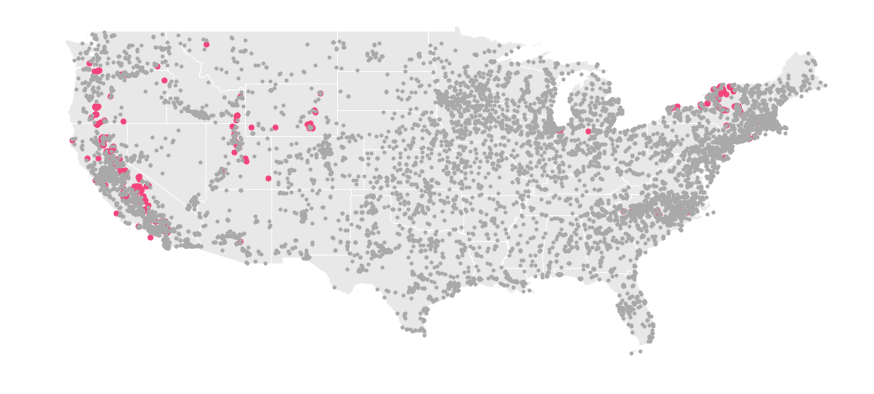

In [20]:
#filter gdf for this list of companies and plot
ax = states.plot(color="lightgrey",edgecolor="white", linewidth=0.5, figsize=(15,10))
powerplants[powerplants["Utility_Na"].isin(companies)].plot(ax=ax, color = "#f4427a", markersize=5)
powerplants[~powerplants["Utility_Na"].isin(companies)].plot(ax=ax, color = "darkgrey", markersize=3)
ax.axis("off")

## (5) Map all of the nuclear power plants in red, with the rest of the plants as dark grey.

(-127.65372665000001,
 -64.059236349999992,
 23.280032899999998,
 50.627421099999999)

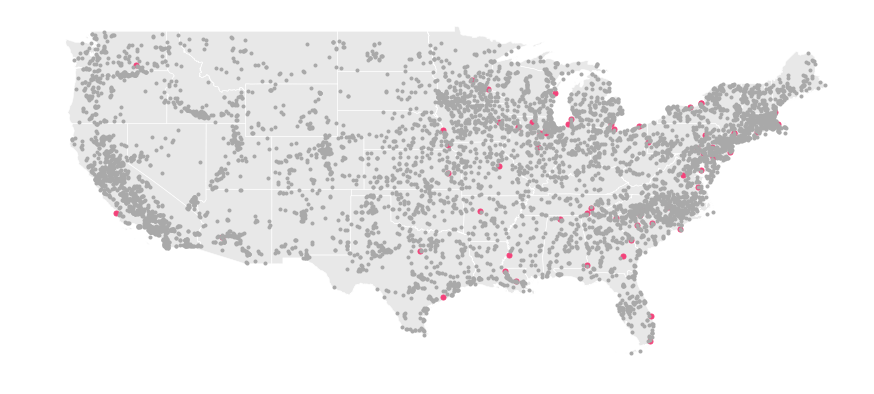

In [21]:
#Two ways to plot this
#First is easier, get the subsets with and without nuclear and plot separately
ax = states.plot(color="lightgrey",edgecolor="white", linewidth=0.5, figsize=(15,10))
powerplants[powerplants.PrimSource == "nuclear"].plot(ax=ax, color="#f4427a",markersize=5)
powerplants[powerplants.PrimSource != "nuclear"].plot(ax=ax, color="darkgrey",markersize=3)
ax.axis("off")

In [22]:
#The second way is to create custom cmaps
powerplants.loc[powerplants.PrimSource == "nuclear", "color"] = "1"
powerplants.loc[powerplants.PrimSource != "nuclear", "color"] = "0"

In [23]:
powerplants.color.value_counts()

0    7343
1      62
Name: color, dtype: int64

(-127.65372665000001,
 -64.059236349999992,
 23.280032899999998,
 50.627421099999999)

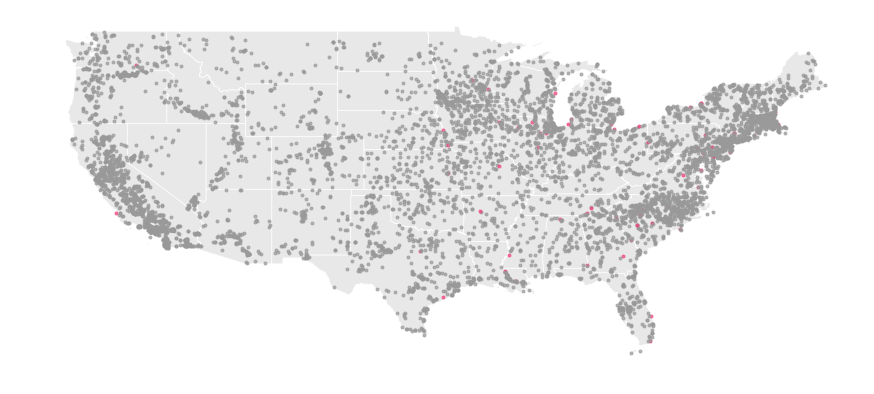

In [24]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('mycmap', [(0, '#999999'), (1, "#f4427a")])
ax = states.plot(color="lightgrey",edgecolor="white", linewidth=0.5, figsize=(15,10))
powerplants.plot(markersize=3, column='color', cmap=cmap, alpha=0.7, ax=ax)
ax.axis('off')

## (6) Map power plants that produce energy through both natural gas and petroleum.

(-127.65372665000001,
 -64.059236349999992,
 23.280032899999998,
 50.627421099999999)

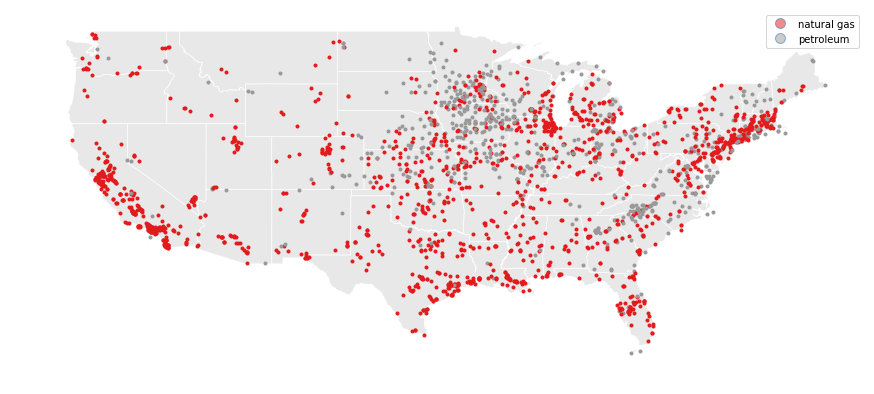

In [25]:
#filter for natural gas and petroleum, plot based on column PrimSource
ax = states.plot(color="lightgrey",edgecolor="white", linewidth=0.5, figsize=(15,10))
powerplants[powerplants.PrimSource.isin(["natural gas","petroleum"])].plot(ax=ax, markersize=3, column='PrimSource', legend=True)
ax.axis("off")

# GROUP TWO: For most of these you'll need a spatial join

## (1) How many power plants are in each state?

In [26]:
#reset_index for the thing we want to group by, in this case states
powerplants_with_states = gpd.sjoin(powerplants, states.reset_index(), how = "inner", op="within")

In [27]:
powerplants_with_states.head()

Plant_Code          Plant_Name        Utility_Na  Utility_ID  \
0           2        Bankhead Dam  Alabama Power Co         195   
1           3               Barry  Alabama Power Co         195   
2           4  Walter Bouldin Dam  Alabama Power Co         195   
3           7             Gadsden  Alabama Power Co         195   
4           8              Gorgas  Alabama Power Co         195   

         sector_nam       City      County    Zip            Street_Add  \
0  Electric Utility  Northport  Tuscaloosa  35476    19001 Lock 17 Road   
1  Electric Utility      Bucks      Mobile  36512      North Highway 43   
2  Electric Utility   Wetumpka      Elmore  36092  750 Bouldin Dam Road   
3  Electric Utility    Gadsden      Etowah  35903     1000 Goodyear Ave   
4  Electric Utility    Parrish      Walker  35580       460 Gorgas Road   

      PrimSource  Total_MW  Coal_MW   NG_MW  Crude_MW  Bio_MW  Hydro_MW  \
0  hydroelectric      56.0      0.0     0.0       0.0     NaN      56.0   
1           coal    2160.5   1088.5  1072.0       0.0     NaN       0.0   
2  hydroelectric     225.9      0.0     0.0       0.0     NaN     225.9   
3    natural gas     130.0      0.0   130.0       0.0     NaN       0.0   
4           coal    1034.0   1034.0     0.0       0.0     NaN       0.0   

   HydroPS_MW  Nuclear_MW  Solar_MW  Wind_MW  Geo_MW  Other_MW  \
0         0.0         0.0       0.0      0.0     NaN       NaN   
1         0.0         0.0       0.0      0.0     NaN       NaN   
2         0.0         0.0       0.0      0.0     NaN       NaN   
3         0.0         0.0       0.0      0.0     NaN       NaN   
4         0.0         0.0       0.0      0.0     NaN       NaN   

                                source_des  \
0                    Hydroelectric = 56 MW   
1  Coal = 1088.5 MW, Natural Gas = 1072 MW   
2                 Hydroelectric = 225.9 MW   
3                     Natural Gas = 130 MW   
4                           Coal = 1034 MW   

                                           tech_desc  \
0                         Conventional Hydroelectric   
1  Conventional Steam Coal; Natural Gas Fired Com...   
2                         Conventional Hydroelectric   
3                          Natural Gas Steam Turbine   
4                            Conventional Steam Coal   

                          Source  Period   Latitude  Longitude  \
0  EIA-860, EIA-860M and EIA-923  201607  33.458665 -87.356823   
1  EIA-860, EIA-860M and EIA-923  201607  31.006900 -88.010300   
2  EIA-860, EIA-860M and EIA-923  201607  32.583889 -86.283056   
3  EIA-860, EIA-860M and EIA-923  201607  34.012800 -85.970800   
4  EIA-860, EIA-860M and EIA-923  201607  33.644344 -87.196486   

                               geometry color  index_right  index  \
0  POINT (-87.35682299999999 33.458665)     0            0      0   
1    POINT (-88.0103 31.00690000000001)     0            0      0   
2          POINT (-86.283056 32.583889)     0            0      0   
3              POINT (-85.9708 34.0128)     0            0      0   
4  POINT (-87.19648599999999 33.644344)     0            0      0   

      AFFGEOID         ALAND      AWATER GEOID LSAD     NAME STATEFP  \
0  0400000US01  131173688951  4593686489    01   00  Alabama      01   
1  0400000US01  131173688951  4593686489    01   00  Alabama      01   
2  0400000US01  131173688951  4593686489    01   00  Alabama      01   
3  0400000US01  131173688951  4593686489    01   00  Alabama      01   
4  0400000US01  131173688951  4593686489    01   00  Alabama      01   

    STATENS STUSPS  
0  01779775     AL  
1  01779775     AL  
2  01779775     AL  
3  01779775     AL  
4  01779775     AL

In [28]:
powerplants_with_states.groupby("index").size()

index
0       72
2      113
3       55
4     1222
5      153
6       88
7       25
8        2
9      139
11     135
12     200
13     133
14     222
15     129
16      76
17     272
18      40
19      49
20      74
21     207
22      92
23      43
24      94
25     207
26      95
27      33
28      89
29      75
30      35
31      62
34     144
35      46
36      84
37      97
38     254
39     219
40     117
41      98
42      66
43     372
44     461
45     148
46     145
47      19
48      61
49     396
50     131
51     135
52     174
dtype: int64

In [29]:
states["pp_count"] = powerplants_with_states.groupby("index").size()

(-127.65372665000001,
 -64.059236349999992,
 23.280032899999998,
 50.627421099999999)

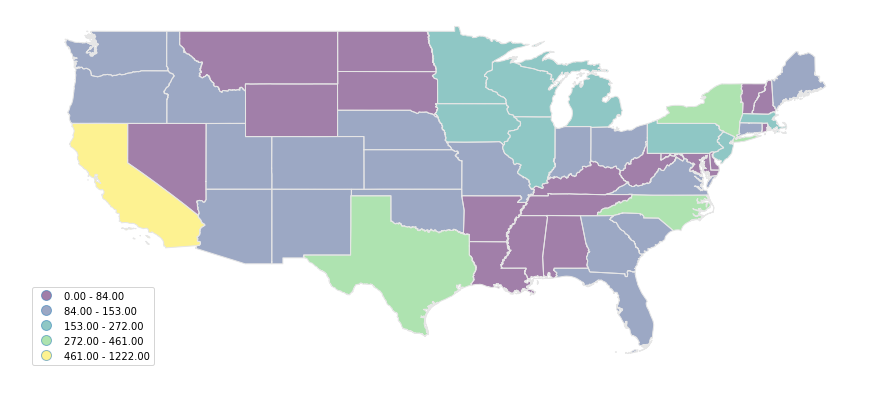

In [30]:
ax = states.plot(column="pp_count", scheme='fisher_jenks',edgecolor='#e6e6e6', legend=True, figsize=(15,10))
ax.axis("off")

## (2) Which power plants are in New York?

In [31]:
newyork = powerplants_with_states[powerplants_with_states["NAME"] == "New York"]

In [32]:
pd.set_option("display.max_rows",1000)
newyork["Plant_Name"].sort_index()

49                                       Ashokan
363                    Central Hudson High Falls
387                          Upper Mechanicville
469                            Jarvis (Hinckley)
1169               Danskammer Generating Station
1170                                   Dashville
1171                                   Neversink
1172                                 South Cairo
1173                                    Sturgeon
1174                              West Coxsackie
1175              Arthur Kill Generating Station
1176                                  East River
1177             Gowanus Gas Turbines Generating
1178                               Hudson Avenue
1179                              Indian Point 2
1180             Narrows Gas Turbines Generating
1181                                  Ravenswood
1182                                 59th Street
1183                                 74th Street
1184                                 E F Barrett
1185                

## (4) Which state produces the most energy from coal?

In [33]:
coal = powerplants_with_states[powerplants_with_states["PrimSource"] == "coal"]

In [34]:
coal.groupby("NAME")["Coal_MW"].sum().sort_values(ascending=False).head()

NAME
Texas           23588.5
Indiana         16111.4
Ohio            15176.7
Illinois        14644.6
Pennsylvania    13313.4
Name: Coal_MW, dtype: float64

## (5a) Map states with nuclear power plants in red, and states without in grey. 

In [35]:
#One way to do this, convert the states into a list and then plot the subset gdf
list = powerplants_with_states[powerplants_with_states["PrimSource"]=="nuclear"]["NAME"].value_counts().reset_index()["index"].unique().tolist()
list

['Illinois',
 'New York',
 'Pennsylvania',
 'South Carolina',
 'Michigan',
 'North Carolina',
 'New Jersey',
 'Georgia',
 'Ohio',
 'Virginia',
 'Texas',
 'Florida',
 'Alabama',
 'Nebraska',
 'Minnesota',
 'Tennessee',
 'Louisiana',
 'Kansas',
 'Washington',
 'Connecticut',
 'Iowa',
 'Arkansas',
 'Wisconsin',
 'New Hampshire',
 'California',
 'Maryland',
 'Missouri',
 'Massachusetts',
 'Arizona',
 'Mississippi']

(-127.65372665000001,
 -64.059236349999992,
 23.280032899999998,
 50.627421099999999)

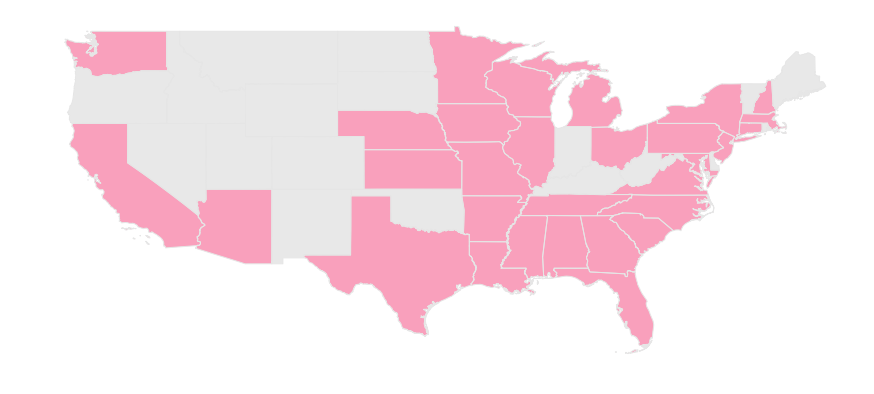

In [36]:
ax = states[states["NAME"].isin(list)].plot(color="#f4427a",edgecolor='#e6e6e6', figsize=(15,10))
states[~states["NAME"].isin(list)].plot(ax=ax,edgecolor='#e6e6e6',color="lightgrey")
ax.axis("off")

In [37]:
#The other way is to get a df of the nuclear states and then merge with the states gdf
nuclear_df = powerplants_with_states[powerplants_with_states["PrimSource"]=="nuclear"]["NAME"].value_counts().reset_index().rename(columns= {"index": "NAME", "NAME": "nuclear_count"})


In [38]:
nuclear_df

NAME  nuclear_count
0         Illinois              6
1         New York              5
2     Pennsylvania              5
3   South Carolina              4
4         Michigan              3
5   North Carolina              3
6       New Jersey              3
7          Georgia              2
8             Ohio              2
9         Virginia              2
10           Texas              2
11         Florida              2
12         Alabama              2
13        Nebraska              2
14       Minnesota              2
15       Tennessee              2
16       Louisiana              2
17          Kansas              1
18      Washington              1
19     Connecticut              1
20            Iowa              1
21        Arkansas              1
22       Wisconsin              1
23   New Hampshire              1
24      California              1
25        Maryland              1
26        Missouri              1
27   Massachusetts              1
28         Arizona              1
29     Mississippi              1

In [39]:
states

AFFGEOID         ALAND        AWATER GEOID LSAD                  NAME  \
0   0400000US01  131173688951    4593686489    01   00               Alabama   
2   0400000US04  294198560125    1027346486    04   00               Arizona   
3   0400000US05  134771517596    2960191698    05   00              Arkansas   
4   0400000US06  403501101370   20466718403    06   00            California   
5   0400000US08  268429343790    1175112870    08   00              Colorado   
6   0400000US09   12542638347    1815476291    09   00           Connecticut   
7   0400000US10    5047194742    1398720828    10   00              Delaware   
8   0400000US11     158364992      18633403    11   00  District of Columbia   
9   0400000US13  149169848456    4741100880    13   00               Georgia   
11  0400000US16  214042908012    2398669593    16   00                 Idaho   
12  0400000US17  143788697679    6206693598    17   00              Illinois   
13  0400000US18   92790545247    1536767065    18   00               Indiana   
14  0400000US19  144667643793    1077808017    19   00                  Iowa   
15  0400000US20  211753253104    1346235678    20   00                Kansas   
16  0400000US24   25147754905    6983312282    24   00              Maryland   
17  0400000US27  206232257655   18929176411    27   00             Minnesota   
18  0400000US28  121529933533    3930505829    28   00           Mississippi   
19  0400000US30  376964956503    3866986696    30   00               Montana   
20  0400000US32  284329326845    2047350887    32   00                Nevada   
21  0400000US34   19050755048    3541927612    34   00            New Jersey   
22  0400000US35  314169362533     755722962    35   00            New Mexico   
23  0400000US38  178711813026    4399093501    38   00          North Dakota   
24  0400000US40  177663722167    3373836066    40   00              Oklahoma   
25  0400000US42  115882226263    3396805575    42   00          Pennsylvania   
26  0400000US45   77861720871    5070943755    45   00        South Carolina   
27  0400000US46  196348407642    3380782733    46   00          South Dakota   
28  0400000US49  212885517115    6999529104    49   00                  Utah   
29  0400000US50   23873467535    1031124865    50   00               Vermont   
30  0400000US54   62265597146     489902816    54   00         West Virginia   
31  0400000US56  251464935120    1861273298    56   00               Wyoming   
34  0400000US12  138924199212   31386038155    12   00               Florida   
35  0400000US21  102266279759    2388770991    21   00              Kentucky   
36  0400000US22  111904912452   23746303848    22   00             Louisiana   
37  0400000US23   79885221885   11748755195    23   00                 Maine   
38  0400000US25   20204442852    7130620748    25   00         Massachusetts   
39  0400000US26  146455251245  104031574060    26   00              Michigan   
40  0400000US29  178052653610    2487575477    29   00              Missouri   
41  0400000US31  198972706218    1356290940    31   00              Nebraska   
42  0400000US33   23187396994    1028678842    33   00         New Hampshire   
43  0400000US36  122053048985   19243095591    36   00              New York   
44  0400000US37  125921301190   13470062955    37   00        North Carolina   
45  0400000US39  105833122995   10264595056    39   00                  Ohio   
46  0400000US41  248604268242    6195105690    41   00                Oregon   
47  0400000US44    2677898725    1323551636    44   00          Rhode Island   
48  0400000US47  106797662267    2355188876    47   00             Tennessee   
49  0400000US48  676633459408   19025991684    48   00                 Texas   
50  0400000US51  102257320053    8528605825    51   00              Virginia   
51  0400000US53  172113416541   12558451099    53   00            Washington   
52  0400000US55  140273604537   29361386480    55   00             Wisconsin   

   STA

In [40]:
combined_nuclear = states.merge(nuclear_df, how="left", on='NAME')
combined_nuclear

AFFGEOID         ALAND        AWATER GEOID LSAD                  NAME  \
0   0400000US01  131173688951    4593686489    01   00               Alabama   
1   0400000US04  294198560125    1027346486    04   00               Arizona   
2   0400000US05  134771517596    2960191698    05   00              Arkansas   
3   0400000US06  403501101370   20466718403    06   00            California   
4   0400000US08  268429343790    1175112870    08   00              Colorado   
5   0400000US09   12542638347    1815476291    09   00           Connecticut   
6   0400000US10    5047194742    1398720828    10   00              Delaware   
7   0400000US11     158364992      18633403    11   00  District of Columbia   
8   0400000US13  149169848456    4741100880    13   00               Georgia   
9   0400000US16  214042908012    2398669593    16   00                 Idaho   
10  0400000US17  143788697679    6206693598    17   00              Illinois   
11  0400000US18   92790545247    1536767065    18   00               Indiana   
12  0400000US19  144667643793    1077808017    19   00                  Iowa   
13  0400000US20  211753253104    1346235678    20   00                Kansas   
14  0400000US24   25147754905    6983312282    24   00              Maryland   
15  0400000US27  206232257655   18929176411    27   00             Minnesota   
16  0400000US28  121529933533    3930505829    28   00           Mississippi   
17  0400000US30  376964956503    3866986696    30   00               Montana   
18  0400000US32  284329326845    2047350887    32   00                Nevada   
19  0400000US34   19050755048    3541927612    34   00            New Jersey   
20  0400000US35  314169362533     755722962    35   00            New Mexico   
21  0400000US38  178711813026    4399093501    38   00          North Dakota   
22  0400000US40  177663722167    3373836066    40   00              Oklahoma   
23  0400000US42  115882226263    3396805575    42   00          Pennsylvania   
24  0400000US45   77861720871    5070943755    45   00        South Carolina   
25  0400000US46  196348407642    3380782733    46   00          South Dakota   
26  0400000US49  212885517115    6999529104    49   00                  Utah   
27  0400000US50   23873467535    1031124865    50   00               Vermont   
28  0400000US54   62265597146     489902816    54   00         West Virginia   
29  0400000US56  251464935120    1861273298    56   00               Wyoming   
30  0400000US12  138924199212   31386038155    12   00               Florida   
31  0400000US21  102266279759    2388770991    21   00              Kentucky   
32  0400000US22  111904912452   23746303848    22   00             Louisiana   
33  0400000US23   79885221885   11748755195    23   00                 Maine   
34  0400000US25   20204442852    7130620748    25   00         Massachusetts   
35  0400000US26  146455251245  104031574060    26   00              Michigan   
36  0400000US29  178052653610    2487575477    29   00              Missouri   
37  0400000US31  198972706218    1356290940    31   00              Nebraska   
38  0400000US33   23187396994    1028678842    33   00         New Hampshire   
39  0400000US36  122053048985   19243095591    36   00              New York   
40  0400000US37  125921301190   13470062955    37   00        North Carolina   
41  0400000US39  105833122995   10264595056    39   00                  Ohio   
42  0400000US41  248604268242    6195105690    41   00                Oregon   
43  0400000US44    2677898725    1323551636    44   00          Rhode Island   
44  0400000US47  106797662267    2355188876    47   00             Tennessee   
45  0400000US48  676633459408   19025991684    48   00                 Texas   
46  0400000US51  102257320053    8528605825    51   00              Virginia   
47  0400000US53  172113416541   12558451099    53   00            Washington   
48  0400000US55  140273604537   29361386480    55   00             Wisconsin   

   STA

In [41]:
# create custom colors
combined_nuclear.loc[combined_nuclear["nuclear_count"].notnull(), "color"] = "1"
combined_nuclear.loc[combined_nuclear["nuclear_count"].isnull(), "color"] = "0"

In [42]:
combined_nuclear.color.value_counts()

1    30
0    19
Name: color, dtype: int64

(-127.65372665000001,
 -64.059236349999992,
 23.280032899999998,
 50.627421099999999)

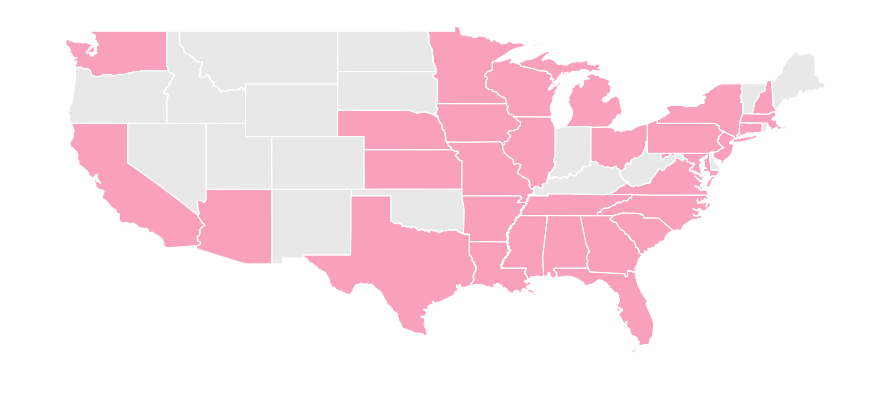

In [43]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('mycmap', [(0, 'lightgrey'), (1, "#f4427a")])
ax = combined_nuclear.plot(markersize=3, column='color', edgecolor='white',cmap=cmap, figsize=(15,10))
ax.axis('off')

## (5b) Map states with solar power plants in yellow, and states without in grey.

In [44]:
solar_df = powerplants_with_states[powerplants_with_states["PrimSource"]=="solar"]["NAME"].value_counts().reset_index().rename(columns= {"index": "NAME", "NAME": "solar_count"})
solar_df

NAME  solar_count
0       California          390
1   North Carolina          310
2    Massachusetts          134
3       New Jersey          125
4          Arizona           57
5          Indiana           39
6       New Mexico           39
7         Colorado           31
8         New York           29
9         Maryland           25
10         Georgia           21
11    Pennsylvania           20
12          Nevada           19
13         Vermont           17
14         Florida           17
15            Utah           16
16           Texas           15
17            Ohio           13
18          Oregon           11
19        Delaware            7
20       Tennessee            5
21        Michigan            4
22        Missouri            4
23    Rhode Island            4
24     Connecticut            4
25        Illinois            3
26        Virginia            2
27       Minnesota            2
28       Wisconsin            1
29  South Carolina            1
30          Kansas            1
31        Nebraska            1
32        Arkansas            1

In [45]:
combined_solar = states.merge(solar_df, how="left", on='NAME')
combined_solar

AFFGEOID         ALAND        AWATER GEOID LSAD                  NAME  \
0   0400000US01  131173688951    4593686489    01   00               Alabama   
1   0400000US04  294198560125    1027346486    04   00               Arizona   
2   0400000US05  134771517596    2960191698    05   00              Arkansas   
3   0400000US06  403501101370   20466718403    06   00            California   
4   0400000US08  268429343790    1175112870    08   00              Colorado   
5   0400000US09   12542638347    1815476291    09   00           Connecticut   
6   0400000US10    5047194742    1398720828    10   00              Delaware   
7   0400000US11     158364992      18633403    11   00  District of Columbia   
8   0400000US13  149169848456    4741100880    13   00               Georgia   
9   0400000US16  214042908012    2398669593    16   00                 Idaho   
10  0400000US17  143788697679    6206693598    17   00              Illinois   
11  0400000US18   92790545247    1536767065    18   00               Indiana   
12  0400000US19  144667643793    1077808017    19   00                  Iowa   
13  0400000US20  211753253104    1346235678    20   00                Kansas   
14  0400000US24   25147754905    6983312282    24   00              Maryland   
15  0400000US27  206232257655   18929176411    27   00             Minnesota   
16  0400000US28  121529933533    3930505829    28   00           Mississippi   
17  0400000US30  376964956503    3866986696    30   00               Montana   
18  0400000US32  284329326845    2047350887    32   00                Nevada   
19  0400000US34   19050755048    3541927612    34   00            New Jersey   
20  0400000US35  314169362533     755722962    35   00            New Mexico   
21  0400000US38  178711813026    4399093501    38   00          North Dakota   
22  0400000US40  177663722167    3373836066    40   00              Oklahoma   
23  0400000US42  115882226263    3396805575    42   00          Pennsylvania   
24  0400000US45   77861720871    5070943755    45   00        South Carolina   
25  0400000US46  196348407642    3380782733    46   00          South Dakota   
26  0400000US49  212885517115    6999529104    49   00                  Utah   
27  0400000US50   23873467535    1031124865    50   00               Vermont   
28  0400000US54   62265597146     489902816    54   00         West Virginia   
29  0400000US56  251464935120    1861273298    56   00               Wyoming   
30  0400000US12  138924199212   31386038155    12   00               Florida   
31  0400000US21  102266279759    2388770991    21   00              Kentucky   
32  0400000US22  111904912452   23746303848    22   00             Louisiana   
33  0400000US23   79885221885   11748755195    23   00                 Maine   
34  0400000US25   20204442852    7130620748    25   00         Massachusetts   
35  0400000US26  146455251245  104031574060    26   00              Michigan   
36  0400000US29  178052653610    2487575477    29   00              Missouri   
37  0400000US31  198972706218    1356290940    31   00              Nebraska   
38  0400000US33   23187396994    1028678842    33   00         New Hampshire   
39  0400000US36  122053048985   19243095591    36   00              New York   
40  0400000US37  125921301190   13470062955    37   00        North Carolina   
41  0400000US39  105833122995   10264595056    39   00                  Ohio   
42  0400000US41  248604268242    6195105690    41   00                Oregon   
43  0400000US44    2677898725    1323551636    44   00          Rhode Island   
44  0400000US47  106797662267    2355188876    47   00             Tennessee   
45  0400000US48  676633459408   19025991684    48   00                 Texas   
46  0400000US51  102257320053    8528605825    51   00              Virginia   
47  0400000US53  172113416541   12558451099    53   00            Washington   
48  0400000US55  140273604537   29361386480    55   00             Wisconsin   

   STA

In [46]:
combined_solar.loc[combined_solar["solar_count"].notnull(), "color"] = "1"
combined_solar.loc[combined_solar["solar_count"].isnull(), "color"] = "0"

(-127.65372665000001,
 -64.059236349999992,
 23.280032899999998,
 50.627421099999999)

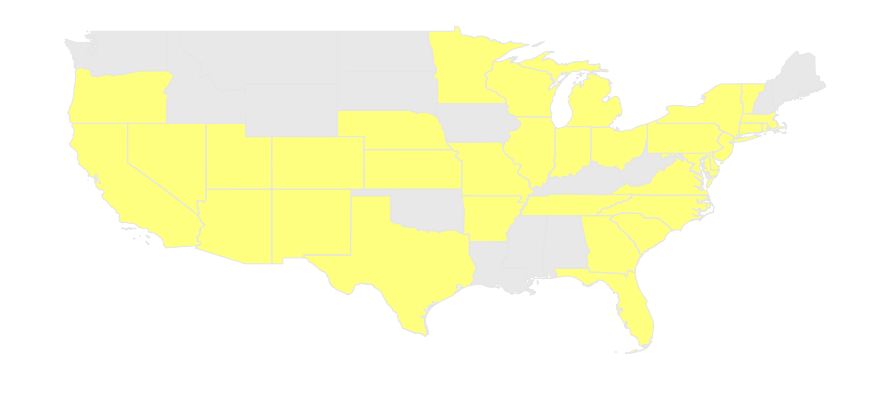

In [47]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('mycmap', [(0, 'lightgrey'), (1, "yellow")])
ax = combined_solar.plot(markersize=3, column='color', cmap=cmap, edgecolor='#e6e6e6',figsize=(15,10))
ax.axis('off')

## (8) Make a map of total wind (or solar or coal) energy produced by each state, with little being a light color and high emissions being a brighter/darker color.

In [48]:
powerplants_with_states[:2]

Plant_Code    Plant_Name        Utility_Na  Utility_ID        sector_nam  \
0           2  Bankhead Dam  Alabama Power Co         195  Electric Utility   
1           3         Barry  Alabama Power Co         195  Electric Utility   

        City      County    Zip          Street_Add     PrimSource  Total_MW  \
0  Northport  Tuscaloosa  35476  19001 Lock 17 Road  hydroelectric      56.0   
1      Bucks      Mobile  36512    North Highway 43           coal    2160.5   

   Coal_MW   NG_MW  Crude_MW  Bio_MW  Hydro_MW  HydroPS_MW  Nuclear_MW  \
0      0.0     0.0       0.0     NaN      56.0         0.0         0.0   
1   1088.5  1072.0       0.0     NaN       0.0         0.0         0.0   

   Solar_MW  Wind_MW  Geo_MW  Other_MW  \
0       0.0      0.0     NaN       NaN   
1       0.0      0.0     NaN       NaN   

                                source_des  \
0                    Hydroelectric = 56 MW   
1  Coal = 1088.5 MW, Natural Gas = 1072 MW   

                                           tech_desc  \
0                         Conventional Hydroelectric   
1  Conventional Steam Coal; Natural Gas Fired Com...   

                          Source  Period   Latitude  Longitude  \
0  EIA-860, EIA-860M and EIA-923  201607  33.458665 -87.356823   
1  EIA-860, EIA-860M and EIA-923  201607  31.006900 -88.010300   

                               geometry color  index_right  index  \
0  POINT (-87.35682299999999 33.458665)     0            0      0   
1    POINT (-88.0103 31.00690000000001)     0            0      0   

      AFFGEOID         ALAND      AWATER GEOID LSAD     NAME STATEFP  \
0  0400000US01  131173688951  4593686489    01   00  Alabama      01   
1  0400000US01  131173688951  4593686489    01   00  Alabama      01   

    STATENS STUSPS  
0  01779775     AL  
1  01779775     AL

In [49]:
#get the total wind energy for each state into a df
wind_df = powerplants_with_states.groupby("NAME")["Wind_MW"].sum().reset_index()

In [50]:
#merge wind df with our gdf
combined_wind = states.merge(wind_df, how="left", on='NAME')
combined_wind.sort_values(by = "Wind_MW", ascending=False)

AFFGEOID         ALAND        AWATER GEOID LSAD                  NAME  \
45  0400000US48  676633459408   19025991684    48   00                 Texas   
12  0400000US19  144667643793    1077808017    19   00                  Iowa   
3   0400000US06  403501101370   20466718403    06   00            California   
22  0400000US40  177663722167    3373836066    40   00              Oklahoma   
13  0400000US20  211753253104    1346235678    20   00                Kansas   
10  0400000US17  143788697679    6206693598    17   00              Illinois   
15  0400000US27  206232257655   18929176411    27   00             Minnesota   
47  0400000US53  172113416541   12558451099    53   00            Washington   
42  0400000US41  248604268242    6195105690    41   00                Oregon   
4   0400000US08  268429343790    1175112870    08   00              Colorado   
11  0400000US18   92790545247    1536767065    18   00               Indiana   
39  0400000US36  122053048985   19243095591    36   00              New York   
21  0400000US38  178711813026    4399093501    38   00          North Dakota   
29  0400000US56  251464935120    1861273298    56   00               Wyoming   
35  0400000US26  146455251245  104031574060    26   00              Michigan   
23  0400000US42  115882226263    3396805575    42   00          Pennsylvania   
20  0400000US35  314169362533     755722962    35   00            New Mexico   
9   0400000US16  214042908012    2398669593    16   00                 Idaho   
37  0400000US31  198972706218    1356290940    31   00              Nebraska   
25  0400000US46  196348407642    3380782733    46   00          South Dakota   
33  0400000US23   79885221885   11748755195    23   00                 Maine   
28  0400000US54   62265597146     489902816    54   00         West Virginia   
17  0400000US30  376964956503    3866986696    30   00               Montana   
36  0400000US29  178052653610    2487575477    29   00              Missouri   
41  0400000US39  105833122995   10264595056    39   00                  Ohio   
26  0400000US49  212885517115    6999529104    49   00                  Utah   
48  0400000US55  140273604537   29361386480    55   00             Wisconsin   
1   0400000US04  294198560125    1027346486    04   00               Arizona   
14  0400000US24   25147754905    6983312282    24   00              Maryland   
38  0400000US33   23187396994    1028678842    33   00         New Hampshire   
18  0400000US32  284329326845    2047350887    32   00                Nevada   
27  0400000US50   23873467535    1031124865    50   00               Vermont   
34  0400000US25   20204442852    7130620748    25   00         Massachusetts   
44  0400000US47  106797662267    2355188876    47   00             Tennessee   
19  0400000US34   19050755048    3541927612    34   00            New Jersey   
43  0400000US44    2677898725    1323551636    44   00          Rhode Island   
6   0400000US10    5047194742    1398720828    10   00              Delaware   
40  0400000US37  125921301190   13470062955    37   00        North Carolina   
46  0400000US51  102257320053    8528605825    51   00              Virginia   
0   0400000US01  131173688951    4593686489    01   00               Alabama   
32  0400000US22  111904912452   23746303848    22   00             Louisiana   
31  0400000US21  102266279759    2388770991    21   00              Kentucky   
30  0400000US12  138924199212   31386038155    12   00               Florida   
16  0400000US28  121529933533    3930505829    28   00           Mississippi   
8   0400000US13  149169848456    4741100880    13   00               Georgia   
7   0400000US11     158364992      18633403    11   00  District of Columbia   
5   0400000US09   12542638347    1815476291    09   00           Connecticut   
2   0400000US05  134771517596    2960191698    05   00              Arkansas   
24  0400000US45   77861720871    5070943755    45   00        South Carolina   

   STA

(-127.65372665000001,
 -64.059236349999992,
 23.280032899999998,
 50.627421099999999)

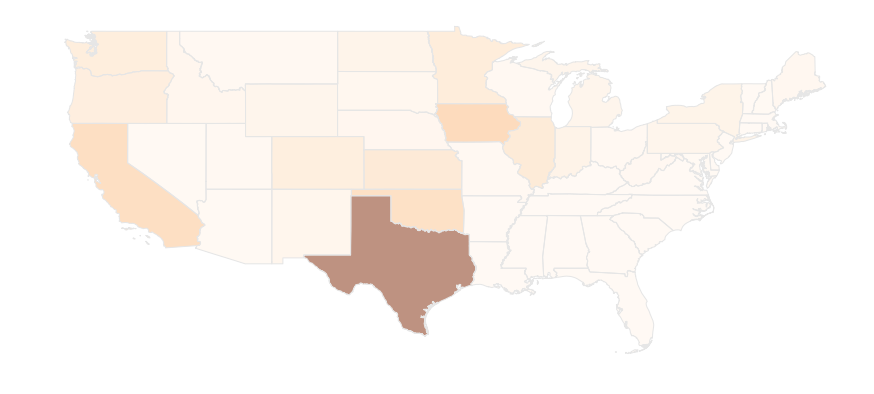

In [51]:
ax = combined_wind.plot(column='Wind_MW', cmap ='Oranges',edgecolor='#e6e6e6', figsize=(15,10))
ax.axis("off")

## (10) Make a map of worst air quality measured in each state, with high quality being light red and low quality being dark red

In [52]:
df = pd.read_csv("pm25_annual.csv")
points = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
airquality = gpd.GeoDataFrame(df, geometry=points)
airquality.crs = {'init': 'epsg:4326'}
airquality = airquality[airquality.within(continental_box)].to_crs(states.crs)
airquality.head(2)

State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0           1            3        10           88101    1  30.497478   
1           1           27         1           88101    1  33.284928   

   Longitude  Datum            Parameter Name Sample Duration  \
0 -87.880258  NAD83  PM2.5 - Local Conditions         24 HOUR   
1 -85.803608  NAD83  PM2.5 - Local Conditions         24 HOUR   

  Pollutant Standard Metric Used  \
0  PM25 24-hour 2012  Daily Mean   
1  PM25 24-hour 2012  Daily Mean   

                                         Method Name  Year  \
0  R & P Model 2025 PM-2.5 Sequential Air Sampler...  2017   
1  R & P Model 2025 PM-2.5 Sequential Air Sampler...  2017   

              Units of Measure Event Type  Observation Count  \
0  Micrograms/cubic meter (LC)  No Events                 28   
1  Micrograms/cubic meter (LC)  No Events                 27   

   Observation Percent Completeness Indicator  Valid Day Count  \
0                   23                      N               28   
1                   22                      N               27   

   Required Day Count  Exceptional Data Count  Null Data Count  \
0                 122                       0                2   
1                 122                       0                5   

   Primary Exceedance Count  Secondary Exceedance Count  \
0                       0.0                         0.0   
1                       0.0                         0.0   

      Certification Indicator  Num Obs Below MDL  Arithmetic Mean  \
0  Certification not required                  0         6.535714   
1  Certification not required                  0         8.851852   

   Arithmetic Standard Dev  1st Max Value  1st Max DateTime  2nd Max Value  \
0                 2.802012           15.4  2017-03-23 00:00           11.9   
1                 4.694708           19.0  2017-03-17 00:00           17.4   

   2nd Max DateTime  3rd Max Value  3rd Max DateTime  4th Max Value  \
0  2017-03-20 00:00           10.5  2017-03-05 00:00            9.2   
1  2017-02-18 00:00           16.3  2017-02-21 00:00           15.0   

   4th Max DateTime  1st Max Non Overlapping Value  1st NO Max DateTime  \
0  2017-03-11 00:00                            NaN                  NaN   
1  2017-03-20 00:00                            NaN                  NaN   

   2nd Max Non Overlapping Value  2nd NO Max DateTime  99th Percentile  \
0                            NaN                  NaN             15.4   
1                            NaN                  NaN             19.0   

   98th Percentile  95th Percentile  90th Percentile  75th Percentile  \
0             15.4             11.9             10.5              8.0   
1             19.0             17.4             16.3             12.4   

   50th Percentile  10th Percentile    Local Site Name  \
0              5.7              3.8  FAIRHOPE, Alabama   
1              8.7              2.9            ASHLAND   

                                             Address State Name County Name  \
0  FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...    Alabama     Baldwin   
1                                    ASHLAND AIRPORT    Alabama        Clay   

  City Name                  CBSA Name Date of Last Change  \
0  Fairhope  Daphne-Fairhope-Foley, AL          2017-05-18   
1   Ashland                        NaN          2017-05-18   

                               geometry  
0  POINT (-87.880258 30.49747800000001)  
1          POINT (-85.803608 33.284928)

In [53]:
#spatial join with states
airquality_with_states = gpd.sjoin(airquality, states.reset_index(), how = "inner", op="within")

In [54]:
air_df = airquality_with_states.groupby("State Name")["1st Max Value"].max().reset_index()

In [265]:
air_df.sort_values(by="State Name").head(10)

State Name  1st Max Value
0               Alabama           47.7
1               Arizona           51.0
2              Arkansas           16.6
3            California           54.9
4              Colorado           28.9
5              Delaware           26.4
6  District Of Columbia           20.1
7               Georgia           55.7
8                 Idaho           22.1
9              Illinois           35.9

In [55]:
states[:2]

AFFGEOID         ALAND      AWATER GEOID LSAD     NAME STATEFP  \
0  0400000US01  131173688951  4593686489    01   00  Alabama      01   
2  0400000US04  294198560125  1027346486    04   00  Arizona      04   

    STATENS STUSPS                                           geometry  \
0  01779775     AL  (POLYGON ((-88.053375 30.506987, -88.051087999...   
2  01779777     AZ  POLYGON ((-114.816294 32.508038, -114.814321 3...   

   pp_count  
0        72  
2       113

In [266]:
combined_air = states.merge(air_df, how="left", left_on='NAME', right_on='State Name')
combined_air.head(10)

AFFGEOID         ALAND       AWATER GEOID LSAD                  NAME  \
0  0400000US01  131173688951   4593686489    01   00               Alabama   
1  0400000US04  294198560125   1027346486    04   00               Arizona   
2  0400000US05  134771517596   2960191698    05   00              Arkansas   
3  0400000US06  403501101370  20466718403    06   00            California   
4  0400000US08  268429343790   1175112870    08   00              Colorado   
5  0400000US09   12542638347   1815476291    09   00           Connecticut   
6  0400000US10    5047194742   1398720828    10   00              Delaware   
7  0400000US11     158364992     18633403    11   00  District of Columbia   
8  0400000US13  149169848456   4741100880    13   00               Georgia   
9  0400000US16  214042908012   2398669593    16   00                 Idaho   

  STATEFP   STATENS STUSPS                                           geometry  \
0      01  01779775     AL  (POLYGON ((-9802056.867629165 3547198.51410040...   
1      04  01779777     AZ  POLYGON ((-12781291.38285079 3807223.52206946,...   
2      05  00068085     AR  POLYGON ((-10532808.98580507 4344142.099989555...   
3      06  01779778     CA  (POLYGON ((-13202983.0836341 3935428.266584924...   
4      08  01779779     CO  POLYGON ((-12140531.82974559 4637779.187709389...   
5      09  01779780     CT  (POLYGON ((-8099765.003031947 5019976.12205694...   
6      10  01779781     DE  (POLYGON ((-8411918.102235692 4768497.86260570...   
7      11  01702382     DC  POLYGON ((-8584932.301979976 4685414.971896453...   
8      13  01705317     GA  (POLYGON ((-9047980.418107381 3650602.63200774...   
9      16  01779783     ID  POLYGON ((-13051394.88024127 5497110.537402972...   

   pp_count  State Name  1st Max Value  
0        72     Alabama           47.7  
1       113     Arizona           51.0  
2        55    Arkansas           16.6  
3      1222  California           54.9  
4       153    Colorado           28.9  
5        88         NaN            NaN  
6        25    Delaware           26.4  
7         2         NaN            NaN  
8       139     Georgia           55.7  
9       135       Idaho           22.1

(-127.65372665000001,
 -64.059236349999992,
 23.280032899999998,
 50.627421099999999)

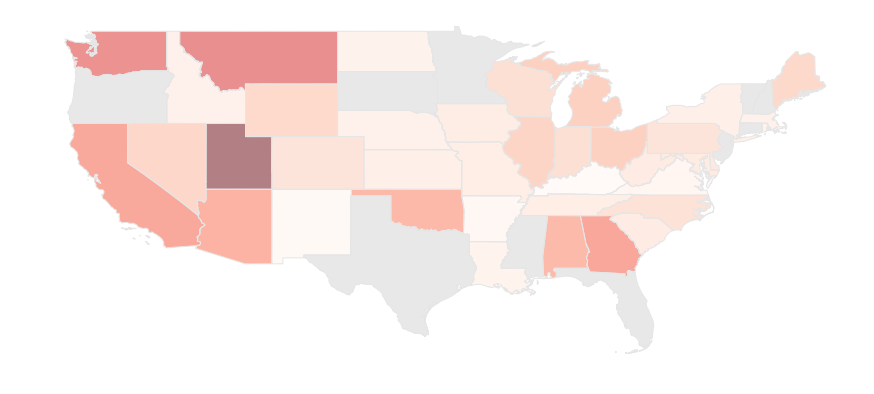

In [58]:
#plot states with air quality readings in Reds
#Plot states without any air quality readings in grey - it's strange that some states don't have air quality readings???
ax = combined_air[combined_air["1st Max Value"].notnull()].plot(column="1st Max Value", cmap ='Reds', figsize=(15,10),edgecolor='#e6e6e6')
combined_air[combined_air["1st Max Value"].isnull()].plot(ax=ax, color='lightgrey',edgecolor='#e6e6e6')
ax.axis("off")

## (13) Which states have the most renewable plants, as a % of total plants? (include hydro, wind, solar)

In [59]:
#The total number of renewable plants grouped by state
renewable_df = powerplants_with_states[powerplants_with_states.PrimSource.isin(["hydroelectric","wind","solar","biomass"])].groupby("NAME")["PrimSource"].count().reset_index()

In [60]:
#rename columns
renewable_df.rename(columns= {"PrimSource":"renewable_pp"}, inplace=True)

In [61]:
#The total plants per state
total_df = powerplants_with_states.groupby("NAME")["PrimSource"].count().reset_index()

In [62]:
#rename columns
total_df.rename(columns= {"PrimSource":"total_pp"}, inplace=True)

In [63]:
#Merge total_df and renewable df
combined_df = renewable_df.merge(total_df, on = "NAME")
combined_df[:2]

NAME  renewable_pp  total_pp
0  Alabama            36        72
1  Arizona            72       113

In [64]:
#calculate % of renewable plants / total plants for each state
combined_df["renewable_percent"] = (combined_df["renewable_pp"]/combined_df["total_pp"])*100

In [65]:
#merge combined_df with states_gdf
renewable_in_states = states.merge(combined_df, on = "NAME")
renewable_in_states.sort_values(by="NAME")

AFFGEOID         ALAND        AWATER GEOID LSAD                  NAME  \
0   0400000US01  131173688951    4593686489    01   00               Alabama   
1   0400000US04  294198560125    1027346486    04   00               Arizona   
2   0400000US05  134771517596    2960191698    05   00              Arkansas   
3   0400000US06  403501101370   20466718403    06   00            California   
4   0400000US08  268429343790    1175112870    08   00              Colorado   
5   0400000US09   12542638347    1815476291    09   00           Connecticut   
6   0400000US10    5047194742    1398720828    10   00              Delaware   
7   0400000US11     158364992      18633403    11   00  District of Columbia   
30  0400000US12  138924199212   31386038155    12   00               Florida   
8   0400000US13  149169848456    4741100880    13   00               Georgia   
9   0400000US16  214042908012    2398669593    16   00                 Idaho   
10  0400000US17  143788697679    6206693598    17   00              Illinois   
11  0400000US18   92790545247    1536767065    18   00               Indiana   
12  0400000US19  144667643793    1077808017    19   00                  Iowa   
13  0400000US20  211753253104    1346235678    20   00                Kansas   
31  0400000US21  102266279759    2388770991    21   00              Kentucky   
32  0400000US22  111904912452   23746303848    22   00             Louisiana   
33  0400000US23   79885221885   11748755195    23   00                 Maine   
14  0400000US24   25147754905    6983312282    24   00              Maryland   
34  0400000US25   20204442852    7130620748    25   00         Massachusetts   
35  0400000US26  146455251245  104031574060    26   00              Michigan   
15  0400000US27  206232257655   18929176411    27   00             Minnesota   
16  0400000US28  121529933533    3930505829    28   00           Mississippi   
36  0400000US29  178052653610    2487575477    29   00              Missouri   
17  0400000US30  376964956503    3866986696    30   00               Montana   
37  0400000US31  198972706218    1356290940    31   00              Nebraska   
18  0400000US32  284329326845    2047350887    32   00                Nevada   
38  0400000US33   23187396994    1028678842    33   00         New Hampshire   
19  0400000US34   19050755048    3541927612    34   00            New Jersey   
20  0400000US35  314169362533     755722962    35   00            New Mexico   
39  0400000US36  122053048985   19243095591    36   00              New York   
40  0400000US37  125921301190   13470062955    37   00        North Carolina   
21  0400000US38  178711813026    4399093501    38   00          North Dakota   
41  0400000US39  105833122995   10264595056    39   00                  Ohio   
22  0400000US40  177663722167    3373836066    40   00              Oklahoma   
42  0400000US41  248604268242    6195105690    41   00                Oregon   
23  0400000US42  115882226263    3396805575    42   00          Pennsylvania   
43  0400000US44    2677898725    1323551636    44   00          Rhode Island   
24  0400000US45   77861720871    5070943755    45   00        South Carolina   
25  0400000US46  196348407642    3380782733    46   00          South Dakota   
44  0400000US47  106797662267    2355188876    47   00             Tennessee   
45  0400000US48  676633459408   19025991684    48   00                 Texas   
26  0400000US49  212885517115    6999529104    49   00                  Utah   
27  0400000US50   23873467535    1031124865    50   00               Vermont   
46  0400000US51  102257320053    8528605825    51   00              Virginia   
47  0400000US53  172113416541   12558451099    53   00            Washington   
28  0400000US54   62265597146     489902816    54   00         West Virginia   
48  0400000US55  140273604537   29361386480    55   00             Wisconsin   
29  0400000US56  251464935120    1861273298    56   00               Wyoming   

   STA

(-127.65372665000001,
 -64.059236349999992,
 23.280032899999998,
 50.627421099999999)

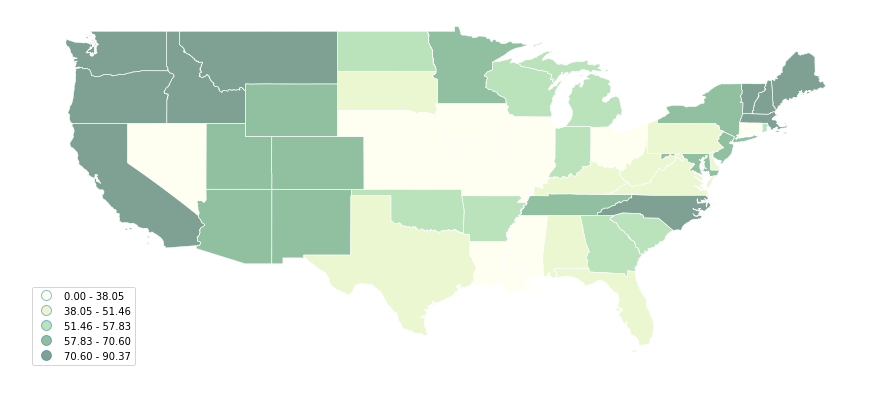

In [66]:
ax = renewable_in_states.plot(column="renewable_percent", cmap='YlGn', scheme = "quantiles", linewidth=0.5, edgecolor='#ffffff', legend=True, figsize=(15,10))
ax.axis("off")

# GROUP THREE: Buffers, or more interesting/complicated analysis

## (1) Do states with coal power plants have dirtier air?

In [267]:
#Find the states with coal power plants 
#Get their mean air readings
#Is there a correlation between the number of coal plants in a state and the air readings

In [67]:
powerplants_with_states[:2]

Plant_Code    Plant_Name        Utility_Na  Utility_ID        sector_nam  \
0           2  Bankhead Dam  Alabama Power Co         195  Electric Utility   
1           3         Barry  Alabama Power Co         195  Electric Utility   

        City      County    Zip          Street_Add     PrimSource  Total_MW  \
0  Northport  Tuscaloosa  35476  19001 Lock 17 Road  hydroelectric      56.0   
1      Bucks      Mobile  36512    North Highway 43           coal    2160.5   

   Coal_MW   NG_MW  Crude_MW  Bio_MW  Hydro_MW  HydroPS_MW  Nuclear_MW  \
0      0.0     0.0       0.0     NaN      56.0         0.0         0.0   
1   1088.5  1072.0       0.0     NaN       0.0         0.0         0.0   

   Solar_MW  Wind_MW  Geo_MW  Other_MW  \
0       0.0      0.0     NaN       NaN   
1       0.0      0.0     NaN       NaN   

                                source_des  \
0                    Hydroelectric = 56 MW   
1  Coal = 1088.5 MW, Natural Gas = 1072 MW   

                                           tech_desc  \
0                         Conventional Hydroelectric   
1  Conventional Steam Coal; Natural Gas Fired Com...   

                          Source  Period   Latitude  Longitude  \
0  EIA-860, EIA-860M and EIA-923  201607  33.458665 -87.356823   
1  EIA-860, EIA-860M and EIA-923  201607  31.006900 -88.010300   

                               geometry color  index_right  index  \
0  POINT (-87.35682299999999 33.458665)     0            0      0   
1    POINT (-88.0103 31.00690000000001)     0            0      0   

      AFFGEOID         ALAND      AWATER GEOID LSAD     NAME STATEFP  \
0  0400000US01  131173688951  4593686489    01   00  Alabama      01   
1  0400000US01  131173688951  4593686489    01   00  Alabama      01   

    STATENS STUSPS  
0  01779775     AL  
1  01779775     AL

In [68]:
#count of coal powerplants in each state
coal_count = powerplants_with_states[powerplants_with_states["PrimSource"]=="coal"].groupby("NAME").size().reset_index()


In [69]:
coal_count.rename(columns= {0:"coal_pp"}, inplace=True)

In [70]:
coal_count[:2]

NAME  coal_pp
0  Alabama        6
1  Arizona        5

In [71]:
total_df[:2]

NAME  total_pp
0  Alabama        72
1  Arizona       113

In [72]:
#merge coal count with total count of pp for each state (states gdf from previous question)
coal_in_states = coal_count.merge(states, on = "NAME")
coal_in_states[:2]

NAME  coal_pp     AFFGEOID         ALAND      AWATER GEOID LSAD STATEFP  \
0  Alabama        6  0400000US01  131173688951  4593686489    01   00      01   
1  Arizona        5  0400000US04  294198560125  1027346486    04   00      04   

    STATENS STUSPS                                           geometry  \
0  01779775     AL  (POLYGON ((-88.053375 30.506987, -88.051087999...   
1  01779777     AZ  POLYGON ((-114.816294 32.508038, -114.814321 3...   

   pp_count  
0        72  
1       113

In [73]:
coal_in_states["coal_percent"] = coal_in_states["coal_pp"]/coal_in_states["pp_count"]*100

In [74]:
coal_in_states[:2]

NAME  coal_pp     AFFGEOID         ALAND      AWATER GEOID LSAD STATEFP  \
0  Alabama        6  0400000US01  131173688951  4593686489    01   00      01   
1  Arizona        5  0400000US04  294198560125  1027346486    04   00      04   

    STATENS STUSPS                                           geometry  \
0  01779775     AL  (POLYGON ((-88.053375 30.506987, -88.051087999...   
1  01779777     AZ  POLYGON ((-114.816294 32.508038, -114.814321 3...   

   pp_count  coal_percent  
0        72      8.333333  
1       113      4.424779

In [120]:
#merge with subset of airquality df
subset_air = airquality[["State Name", "Arithmetic Mean"]]
subset_air = subset_air.groupby("State Name")["Arithmetic Mean"].mean().reset_index()
coal_airquality = coal_in_states.merge(subset_air, left_on = "NAME", right_on = "State Name")
coal_airquality.head()

NAME  coal_pp     AFFGEOID         ALAND       AWATER GEOID LSAD  \
0     Alabama        6  0400000US01  131173688951   4593686489    01   00   
1     Arizona        5  0400000US04  294198560125   1027346486    04   00   
2    Arkansas        5  0400000US05  134771517596   2960191698    05   00   
3  California        2  0400000US06  403501101370  20466718403    06   00   
4    Colorado       10  0400000US08  268429343790   1175112870    08   00   

  STATEFP   STATENS STUSPS                                           geometry  \
0      01  01779775     AL  (POLYGON ((-88.053375 30.506987, -88.051087999...   
1      04  01779777     AZ  POLYGON ((-114.816294 32.508038, -114.814321 3...   
2      05  00068085     AR  POLYGON ((-94.6178329666013 36.4994141203285, ...   
3      06  01779778     CA  (POLYGON ((-118.604415 33.478552, -118.598783 ...   
4      08  01779779     CO  POLYGON ((-109.060253 38.599328, -109.059541 3...   

   pp_count  coal_percent  State Name  Arithmetic Mean  
0        72      8.333333     Alabama         8.760905  
1       113      4.424779     Arizona         7.168218  
2        55      9.090909    Arkansas         7.637450  
3      1222      0.163666  California         8.001526  
4       153      6.535948    Colorado         6.698443

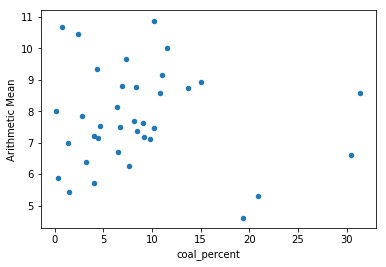

In [77]:
#There is a weak relationship between the percentage of coal plants within a state and its air quality 
coal_airquality.plot(kind="scatter", x="coal_percent", y="Arithmetic Mean")

## (2) Which power plants are within 75 miles of New York City?

In [277]:
#Create a 75 mile or 120701 m buffer around NYC
#Find the powerplants within the union buffer
#Plot states that intersect the union buffer

In [278]:
#40.7128° N, 74.0060° W
nyc = gpd.GeoDataFrame(geometry=[Point(-74.0060, 40.7128)])
nyc.crs = {'init': 'epsg:4326'}
nyc=nyc.to_crs({'proj':'merc'})

In [279]:
nyc_buffer = nyc.buffer(120701)

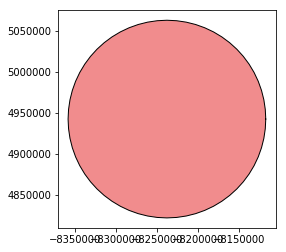

In [280]:
nyc_buffer.plot()

In [281]:
nyc_buffer

0    POLYGON ((-8117609.235647004 4942194.77810255,...
dtype: object

In [282]:
powerplants = powerplants.to_crs({'proj': 'merc'})

In [283]:
powerplants_near_nyc = powerplants[powerplants.within(nyc_buffer.unary_union)]
powerplants_near_nyc.head()

Plant_Code        Plant_Name      PrimSource  \
341         539  Rocky River (CT)  pumped storage   
344         542           Cos Cob       petroleum   
345         544     Devon Station       petroleum   
350         552           Shepaug   hydroelectric   
351         553         Stevenson   hydroelectric   

                                         geometry  
341  POINT (-8174735.674454964 5042032.823263931)  
344  POINT (-8192992.070945063 4960601.958350212)  
345  POINT (-8138453.980737659 4987128.813487456)  
350  POINT (-8159197.811249532 5022234.808351187)  
351  POINT (-8145402.988630938 5012641.452815114)

In [284]:
states = states.to_crs({'proj': 'merc'})

(-9012040.3472093977,
 -7942684.535300279,
 4639125.015249813,
 5639243.0537331142)

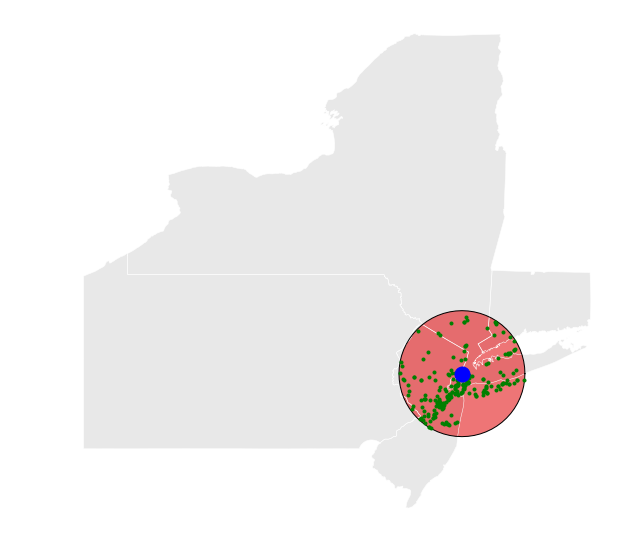

In [285]:
ax = states[states.intersects(nyc_buffer.unary_union)].plot(color="lightgrey",linewidth=0.5, edgecolor='#ffffff', figsize=(10,10))
nyc_buffer.plot(alpha=0.6, ax=ax)
powerplants_near_nyc.plot(markersize=3, color='green', ax=ax)
nyc.plot(markersize=15, color='blue', alpha=1, ax=ax)
ax.axis('off')


## (3) Map all of the power plants in New York, New Jersey, Pennsylvania and Connecticut. Have a nice bottom layer of those 4 states. 

In [ ]:
#create bounded_states so that the gdf is in just these 4 states
#look for the powerplants contained within the union of the 4 states
#but first, check that both GeoDataFrames have the same CRS

In [125]:
bounded_states = states[states["NAME"].isin(["New York","New Jersey","Pennsylvania","Connecticut"])]
bounded_states

AFFGEOID         ALAND       AWATER GEOID LSAD          NAME STATEFP  \
6   0400000US09   12542638347   1815476291    09   00   Connecticut      09   
21  0400000US34   19050755048   3541927612    34   00    New Jersey      34   
25  0400000US42  115882226263   3396805575    42   00  Pennsylvania      42   
43  0400000US36  122053048985  19243095591    36   00      New York      36   

     STATENS STUSPS                                           geometry  \
6   01779780     CT  (POLYGON ((-8099765.003031947 5019976.12205694...   
21  01779795     NJ  POLYGON ((-8411200.759437017 4784925.26094381,...   
25  01779798     PA  POLYGON ((-8963433.264849892 4970597.45550495,...   
43  01779796     NY  (POLYGON ((-8019103.213946935 5021083.71875712...   

    pp_count  
6         88  
21       207  
25       207  
43       372

In [88]:
bounded_states.crs

{'proj': 'merc'}

In [89]:
powerplants.crs

{'proj': 'merc'}

In [286]:
powerplants_bounded = powerplants[powerplants.within(bounded_states.unary_union)]

(-9012040.3472093977,
 -7942684.535300279,
 4639125.0152498735,
 5639243.0537331393)

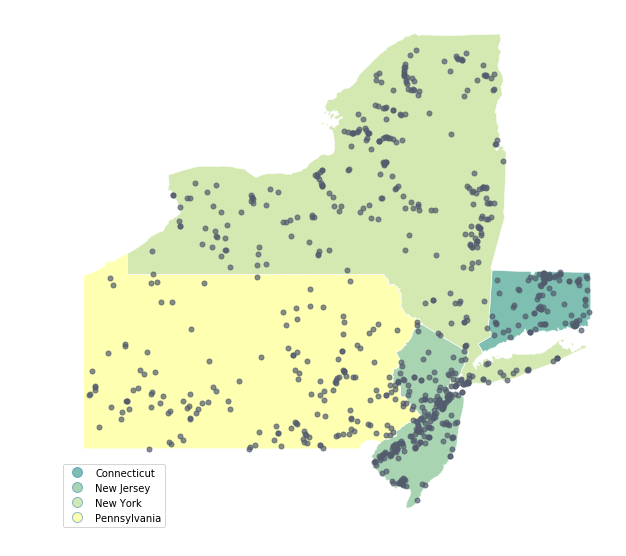

In [287]:
ax = bounded_states.plot(column= "NAME", cmap ="summer", linewidth=0.5, edgecolor='#ffffff', legend=True, figsize=(10,10))
powerplants_bounded.plot(ax=ax, markersize=5, color='#525C6E', alpha=0.7)
ax.axis("off")


## (4) Map the most popular power source for each state

In [ ]:
#Find the #1 powerplant source for each state
#Merge with states GeoDataFrame
#Plot with column = #1 powerplant

In [294]:
pop_powersource = powerplants_with_states.groupby(['NAME', 'PrimSource'])['Total_MW'].sum().groupby(level=0).nlargest(1).reset_index(level=0)



In [291]:
pop_powersource.head()

NAME  Total_MW
NAME       PrimSource                       
Alabama    natural gas     Alabama   11386.0
Arizona    natural gas     Arizona   13412.7
Arkansas   natural gas    Arkansas    6145.2
California natural gas  California   42443.5
Colorado   natural gas    Colorado    6628.2

In [295]:
pop_powersource = pop_powersource.rename(columns={'NAME':'state'})
pop_powersource.head()

state  Total_MW
NAME       PrimSource                       
Alabama    natural gas     Alabama   11386.0
Arizona    natural gas     Arizona   13412.7
Arkansas   natural gas    Arkansas    6145.2
California natural gas  California   42443.5
Colorado   natural gas    Colorado    6628.2

In [296]:
pop_powersource.index

MultiIndex(levels=[['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], ['biomass', 'coal', 'hydroelectric', 'natural gas', 'nuclear', 'wind']],
           labels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48], [3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 2, 1, 1, 5, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 

In [297]:
pop_powersource = pop_powersource.reset_index()
pop_powersource.head()

NAME   PrimSource       state  Total_MW
0     Alabama  natural gas     Alabama   11386.0
1     Arizona  natural gas     Arizona   13412.7
2    Arkansas  natural gas    Arkansas    6145.2
3  California  natural gas  California   42443.5
4    Colorado  natural gas    Colorado    6628.2

In [97]:
del pop_powersource["state"]
pop_powersource= pop_powersource.rename(columns={'PrimSource':'#1_plant'})
pop_powersource.head()

NAME     #1_plant  Total_MW
0     Alabama  natural gas   11386.0
1     Arizona  natural gas   13412.7
2    Arkansas  natural gas    6145.2
3  California  natural gas   42443.5
4    Colorado  natural gas    6628.2

In [98]:
states.head()

AFFGEOID         ALAND       AWATER GEOID LSAD        NAME STATEFP  \
0  0400000US01  131173688951   4593686489    01   00     Alabama      01   
2  0400000US04  294198560125   1027346486    04   00     Arizona      04   
3  0400000US05  134771517596   2960191698    05   00    Arkansas      05   
4  0400000US06  403501101370  20466718403    06   00  California      06   
5  0400000US08  268429343790   1175112870    08   00    Colorado      08   

    STATENS STUSPS                                           geometry  \
0  01779775     AL  (POLYGON ((-9802056.867629165 3547198.51410046...   
2  01779777     AZ  POLYGON ((-12781291.38285079 3807223.522069516...   
3  00068085     AR  POLYGON ((-10532808.98580507 4344142.099989594...   
4  01779778     CA  (POLYGON ((-13202983.0836341 3935428.266584977...   
5  01779779     CO  POLYGON ((-12140531.82974559 4637779.187709421...   

   pp_count  
0        72  
2       113  
3        55  
4      1222  
5       153

In [99]:
#merge with states GeoDataFrame, we're keeping the geometry for states
combined_df = states.merge(pop_powersource, how="left", on='NAME')

In [100]:
combined_df.head()

AFFGEOID         ALAND       AWATER GEOID LSAD        NAME STATEFP  \
0  0400000US01  131173688951   4593686489    01   00     Alabama      01   
1  0400000US04  294198560125   1027346486    04   00     Arizona      04   
2  0400000US05  134771517596   2960191698    05   00    Arkansas      05   
3  0400000US06  403501101370  20466718403    06   00  California      06   
4  0400000US08  268429343790   1175112870    08   00    Colorado      08   

    STATENS STUSPS                                           geometry  \
0  01779775     AL  (POLYGON ((-9802056.867629165 3547198.51410046...   
1  01779777     AZ  POLYGON ((-12781291.38285079 3807223.522069516...   
2  00068085     AR  POLYGON ((-10532808.98580507 4344142.099989594...   
3  01779778     CA  (POLYGON ((-13202983.0836341 3935428.266584977...   
4  01779779     CO  POLYGON ((-12140531.82974559 4637779.187709421...   

   pp_count     #1_plant  Total_MW  
0        72  natural gas   11386.0  
1       113  natural gas   13412.7  
2        55  natural gas    6145.2  
3      1222  natural gas   42443.5  
4       153  natural gas    6628.2

(-14210347.848541735,
 -7131041.5710879602,
 2624135.1346225599,
 6483295.4173965296)

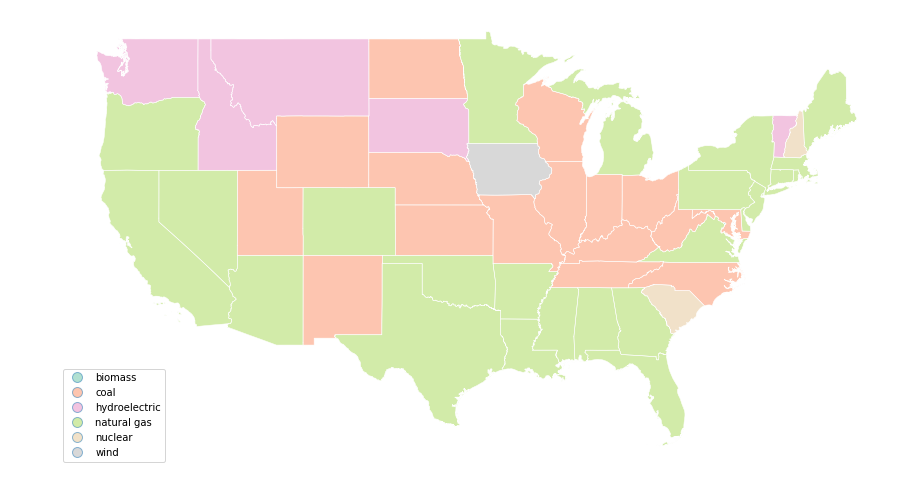

In [101]:
ax = combined_df.plot(column="#1_plant",linewidth=0.5, cmap='Set2', legend=True, edgecolor='#ffffff',figsize=(15,10))
ax.axis("off")

## (5) Get the average (or highest/worst) PM2.5 within 5000m of each power plant. Is coal dirtier than other kinds of plants?

In [ ]:
#Create a 5000m buffer around all powerplants and create a union
#Find air quality stations near the union of the powerplants using within
#Calculate the air quality reading for stations near these powerplants
#Do the same for each energy source of powerplants

In [205]:
powerplants = powerplants[['Plant_Code','Plant_Name','PrimSource','geometry']]
powerplants.head().reset_index(level=0)

index  Plant_Code          Plant_Name     PrimSource  \
0      0           2        Bankhead Dam  hydroelectric   
1      1           3               Barry           coal   
2      2           4  Walter Bouldin Dam  hydroelectric   
3      3           7             Gadsden    natural gas   
4      4           8              Gorgas           coal   

                                       geometry  
0  POINT (-9724517.053678129 3909340.293418585)  
1  POINT (-9797261.780563243 3589737.144647329)  
2  POINT (-9604985.858007506 3794293.243440694)  
3  POINT (-9570225.679090364 3982829.598532316)  
4  POINT (-9706668.420482805 3933911.241182155)

In [243]:
powerplants_buffer = powerplants.buffer(5000)
powerplants_buffer.head()

0    POLYGON ((-9719517.053678129 3909340.293418585...
1    POLYGON ((-9792261.780563243 3589737.144647329...
2    POLYGON ((-9599985.858007506 3794293.243440694...
3    POLYGON ((-9565225.679090364 3982829.598532316...
4    POLYGON ((-9701668.420482805 3933911.241182155...
dtype: object

In [244]:
powerplants_buffer.crs

{'proj': 'merc'}

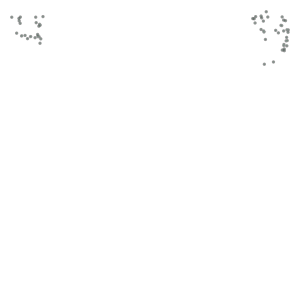

In [245]:
powerplants_union = powerplants_buffer.unary_union
powerplants_union[:50]

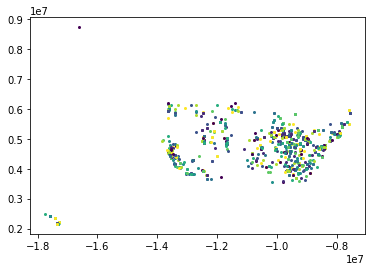

In [216]:
pm_df = pd.read_csv("pm25_annual.csv")
points = pm_df.apply(lambda row: Point(row.Longitude, row.Latitude),axis=1)
air = gpd.GeoDataFrame(pm_df, geometry=points)
air.crs = {'init': 'epsg:4326'}
air.to_crs(powerplants_buffer.crs, inplace=True)
air.plot()

In [300]:
air_near_powerplants = air[air.within(powerplants_union)]
air_near_powerplants[:2]

State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
20           1          101      1002           88101    1  32.412811   
21           1          101      1002           88101    2  32.412811   

    Longitude  Datum            Parameter Name Sample Duration  \
20 -86.263394  NAD83  PM2.5 - Local Conditions         24 HOUR   
21 -86.263394  NAD83  PM2.5 - Local Conditions         24 HOUR   

   Pollutant Standard Metric Used  \
20  PM25 24-hour 2012  Daily Mean   
21  PM25 24-hour 2012  Daily Mean   

                                          Method Name  Year  \
20  R & P Model 2025 PM-2.5 Sequential Air Sampler...  2017   
21  R & P Model 2025 PM-2.5 Sequential Air Sampler...  2017   

               Units of Measure Event Type  Observation Count  \
20  Micrograms/cubic meter (LC)  No Events                 30   
21  Micrograms/cubic meter (LC)  No Events                 15   

    Observation Percent Completeness Indicator  Valid Day Count  \
20                   25                      N               30   
21                   25                      N               15   

    Required Day Count  Exceptional Data Count  Null Data Count  \
20                 122                       0                0   
21                  61                       0                0   

    Primary Exceedance Count  Secondary Exceedance Count  \
20                       0.0                         0.0   
21                       0.0                         0.0   

       Certification Indicator  Num Obs Below MDL  Arithmetic Mean  \
20  Certification not required                  0         9.810000   
21  Certification not required                  0         8.686667   

    Arithmetic Standard Dev  1st Max Value  1st Max DateTime  2nd Max Value  \
20                 5.592689           28.2  2017-03-05 00:00           22.1   
21                 3.672848           15.3  2017-02-06 00:00           14.1   

    2nd Max DateTime  3rd Max Value  3rd Max DateTime  4th Max Value  \
20  2017-02-21 00:00           15.7  2017-02-27 00:00           15.6   
21  2017-02-18 00:00           12.4  2017-01-13 00:00           11.4   

    4th Max DateTime  1st Max Non Overlapping Value  1st NO Max DateTime  \
20  2017-03-17 00:00                            NaN                  NaN   
21  2017-03-20 00:00                            NaN                  NaN   

    2nd Max Non Overlapping Value  2nd NO Max DateTime  99th Percentile  \
20                            NaN                  NaN             28.2   
21                            NaN                  NaN             15.3   

    98th Percentile  95th Percentile  90th Percentile  75th Percentile  \
20             28.2             22.1             15.7             12.6   
21             15.3             15.3             14.1             11.4   

    50th Percentile  10th Percentile Local Site Name  \
20              8.7              4.9      MOMS, ADEM   
21              8.8              4.3      MOMS, ADEM   

                                    Address State Name County Name  \
20  1350 COLISEUM BLVD, MONTGOMERY, ALABAMA    Alabama  Montgomery   
21  1350 COLISEUM BLVD, MONTGOMERY, ALABAMA    Alabama  Montgomery   

     City Name       CBSA Name Date of Last Change  \
20  Montgomery  Montgomery, AL          2017-05-18   
21  Montgomery  Montgomery, AL          2017-05-18   

                                        geometry  
20  POINT (-9602797.094179528 3794719.997430201)  
21  POINT (-9602797.094179528 3794719.997430201)

In [247]:
#The average maximum air quality reading near ALL powerplants
air_near_powerplants["1st Max Value"].mean()

23.895945945945943

In [248]:
#To find the average maximum air quality for EACH power source
#Create a list of the energy sources
energy_sources = powerplants["PrimSource"].value_counts().reset_index()["index"].tolist()

In [249]:
energy_sources

['natural gas',
 'solar',
 'hydroelectric',
 'wind',
 'biomass',
 'petroleum',
 'coal',
 'other',
 'geothermal',
 'nuclear',
 'pumped storage']

In [242]:
#Before we loop through our energy sources, let's test our code on just coal powerplants
powerplants[powerplants["PrimSource"] == "coal"]

Plant_Code                               Plant_Name PrimSource  \
1              3                                    Barry       coal   
4              8                                   Gorgas       coal   
18            26                               E C Gaston       coal   
23            47                                  Colbert       coal   
26            51                              Dolet Hills       coal   
30            56                         Charles R Lowman       coal   
31            59                                   Platte       coal   
32            60                     Whelan Energy Center       coal   
48            87                                Escalante       coal   
59           108                                  Holcomb       coal   
61           113                                   Cholla       coal   
69           127                                Oklaunion       coal   
70           130                                    Cross       coal   
71           136                            Seminole (FL)       coal   
84           160                           Apache Station       coal   
87           165                                     GREC       coal   
107          207                St Johns River Power Park       coal   
177          298                                Limestone       coal   
227          384                                Joliet 29       coal   
296          470                            Comanche (CO)       coal   
302          477                                  Valmont       coal   
312          492                             Martin Drake       coal   
321          508                              Lamar Plant       coal   
334          525                                   Hayden       coal   
335          527                                    Nucla       coal   
359          564                    Stanton Energy Center       coal   
362          568                       Bridgeport Station       coal   
373          594          Indian River Generating Station       coal   
376          602                           Brandon Shores       coal   
390          628                            Crystal River       coal   
395          641                                    Crist       coal   
397          645                                 Big Bend       coal   
399          663             Deerhaven Generating Station       coal   
403          667             Northside Generating Station       coal   
418          703                                    Bowen       coal   
422          708                                  Hammond       coal   
436          727                            Mitchell (GA)       coal   
445          753                              Crisp Plant       coal   
499          856                              E D Edwards       coal   
500          861                                  Coffeen       coal   
503          874                                 Joliet 9       coal   
504          876                   Kincaid Generation LLC       coal   
505          879                                 Powerton       coal   
507          883                                 Waukegan       coal   
508          884                              Will County       coal   
510          887                              Joppa Steam       coal   
511          889                   Baldwin Energy Complex       coal   
512          891                                   Havana       coal   
513          892                   Hennepin Power Station       coal   
539          963                                  Dallman       coal   
545          976                                   Marion       coal   
546          983                             Clifty Creek       coal   
552          994                           AES Petersburg       coal   
553          995                                   Bailly       coal   
554          997                            Mi

In [252]:
#Find the air mean max quality reading for the coal powerplants 
air[air.within(powerplants[powerplants["PrimSource"] == "coal"].buffer(5000).unary_union)]["1st Max Value"].mean()

18.209999999999997

In [259]:
#OK, now let's loop through the energy sources
#extract the subset into a dictionary
df_list = []
df_energy = {}

for energy in energy_sources:
    df_energy["energy"] = energy
    df_energy["Mean Max Value"] = air[air.within(powerplants[powerplants["PrimSource"] == energy].buffer(5000).unary_union)]["1st Max Value"].mean() 
    df_list.append(df_energy["energy"])  
    df_list.append(df_energy["Mean Max Value"])
    
    

In [261]:
#Hydroelecteic and Natural gas plants actually have the worst max air quality readings
df_list

['natural gas',
 26.172413793103452,
 'solar',
 22.925000000000001,
 'hydroelectric',
 31.610000000000003,
 'wind',
 12.75,
 'biomass',
 23.683333333333337,
 'petroleum',
 18.960000000000001,
 'coal',
 18.209999999999997,
 'other',
 20.875,
 'geothermal',
 20.300000000000001,
 'nuclear',
 nan,
 'pumped storage',
 10.050000000000001]

## (6) Make a map of the power plants within 150 miles of New York City. I want it centered on New York City, zoomed in a good amount.

In [269]:
nyc = gpd.GeoDataFrame(geometry=[Point(-74.0060, 40.7128)])
nyc.crs = {'init': 'epsg:4326'}
nyc=nyc.to_crs({'proj':'merc'})

In [270]:
nyc_buffer = nyc.buffer(241402)

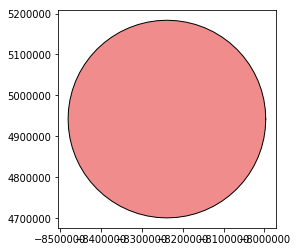

In [271]:
nyc_buffer.plot()

In [272]:
nyc_buffer

0    POLYGON ((-7996908.235647004 4942194.77810255,...
dtype: object

In [273]:
powerplants = powerplants.to_crs({'proj': 'merc'})

In [274]:
powerplants_near_nyc = powerplants[powerplants.within(nyc_buffer.unary_union)]
powerplants_near_nyc

Plant_Code                                Plant_Name      PrimSource  \
49            88                                   Ashokan   hydroelectric   
341          539                          Rocky River (CT)  pumped storage   
342          540                                  Branford       petroleum   
343          541                              Bulls Bridge   hydroelectric   
344          542                                   Cos Cob       petroleum   
345          544                             Devon Station       petroleum   
346          546                         Montville Station       petroleum   
349          551                              Scotland Dam   hydroelectric   
350          552                                   Shepaug   hydroelectric   
351          553                                 Stevenson   hydroelectric   
352          554                                 Taftville   hydroelectric   
353          557                                    Tunnel       petroleum   
354          559                              Rainbow (CT)   hydroelectric   
355          560                             Falls Village   hydroelectric   
356          561                            Franklin Drive       petroleum   
357          562                                Middletown       petroleum   
358          563                              South Meadow       petroleum   
360          565                       Torrington Terminal       petroleum   
361          566                                 Millstone         nuclear   
362          568                        Bridgeport Station            coal   
363          579                 Central Hudson High Falls   hydroelectric   
364          581                         North Main Street       petroleum   
365          583                              Tenth Street   hydroelectric   
370          591                                Christiana       petroleum   
372          593                                 Edge Moor     natural gas   
819         1630                           Cobble Mountain   hydroelectric   
824         1642         Essential Power Massachusetts LLC     natural gas   
825         1643                             Woodland Road       petroleum   
1147        2388                              Oyster Creek         nuclear   
1148        2390                                Sayreville     natural gas   
1149        2393                                   Gilbert     natural gas   
1150        2398                 Bergen Generating Station     natural gas   
1151        2399        PSEG Burlington Generating Station     natural gas   
1152        2401             PSEG Essex Generating Station     natural gas   
1153        2403            PSEG Hudson Generating Station     natural gas   
1154        2404            PSEG Kearny Generating Station     natural gas   
1155        2406            PSEG Linden Generating Station     natural gas   
1156        2408            PSEG Mercer Generating Station            coal   
1158        2411           PSEG Sewaren Generating Station     natural gas   
1159        2434                               Howard Down     natural gas   
1169        2480             Danskammer Generating Station     natural gas   
1170        2481                                 Dashville   hydroelectric   
1171        2483                                 Neversink   hydroelectric   
1172        2485                               South Cairo       petroleum   
1173        2486                                  Sturgeon   hydroelectric   
1174        2487                            West Coxsackie       petroleum   
1175        2490            Arthur Kill Generating Station     natural gas   
1176        2493                                East River     natural gas   
1177        2494           Gowanus Gas Turbines Generating     natural gas   
1178        2496                             Hudson Avenue       petroleum   
1179        2497            

In [275]:
states = states.to_crs({'proj': 'merc'})

(-9022385.2730547916,
 -7725441.0925470153,
 4567910.8571597766,
 5642634.2041183673)

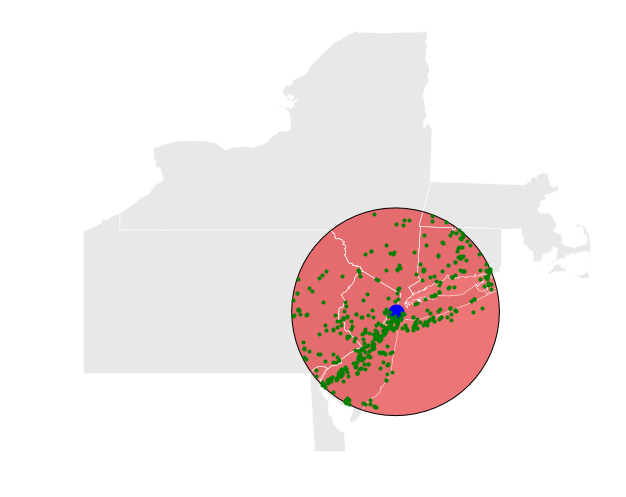

In [276]:
ax = states[states.intersects(nyc_buffer.unary_union)].plot(color="lightgrey",linewidth=0.5, edgecolor='#ffffff', figsize=(10,10))
nyc_buffer.plot(alpha=0.6, ax=ax)
nyc.plot(markersize=15, color='blue', alpha=1, ax=ax)
powerplants_near_nyc.plot(markersize=3, color='green', ax=ax)
ax.axis('off')


## (7) Are places with below-average air quality closer to power plants?

In [366]:
#find below average air quality stations, union them
#find the distance of the powerplants from the below average air station union
#do the same for the above average air quality stations

In [314]:
df = pd.read_csv("pm25_annual.csv")
points = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
airquality = gpd.GeoDataFrame(df, geometry=points)
airquality.crs = {'init': 'epsg:4326'}
airquality = airquality[airquality.within(continental_box)].to_crs(states.crs)

In [315]:
average = airquality["Arithmetic Mean"].mean()
average

7.9949747399770903

In [337]:
above_average_air = airquality[airquality["Arithmetic Mean"] < average]
above_average_air.head()

State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0            1            3        10           88101    1  30.497478   
2            1           33      1002           88101    1  34.762619   
17           1           89        14           88101    1  34.687761   
19           1           97         3           88101    1  30.770181   
22           1          103        11           88101    1  34.530717   

    Longitude  Datum            Parameter Name Sample Duration  \
0  -87.880258  NAD83  PM2.5 - Local Conditions         24 HOUR   
2  -87.638097  NAD83  PM2.5 - Local Conditions         24 HOUR   
17 -86.586362  WGS84  PM2.5 - Local Conditions         24 HOUR   
19 -88.087761  NAD83  PM2.5 - Local Conditions         24 HOUR   
22 -86.967536  NAD83  PM2.5 - Local Conditions         24 HOUR   

   Pollutant Standard Metric Used  \
0   PM25 24-hour 2012  Daily Mean   
2   PM25 24-hour 2012  Daily Mean   
17  PM25 24-hour 2012  Daily Mean   
19  PM25 24-hour 2012  Daily Mean   
22  PM25 24-hour 2012  Daily Mean   

                                          Method Name  Year  \
0   R & P Model 2025 PM-2.5 Sequential Air Sampler...  2017   
2   R & P Model 2025 PM-2.5 Sequential Air Sampler...  2017   
17  R & P Model 2025 PM-2.5 Sequential Air Sampler...  2017   
19  R & P Model 2025 PM-2.5 Sequential Air Sampler...  2017   
22  R & P Model 2025 PM-2.5 Sequential Air Sampler...  2017   

               Units of Measure Event Type  Observation Count  \
0   Micrograms/cubic meter (LC)  No Events                 28   
2   Micrograms/cubic meter (LC)  No Events                 30   
17  Micrograms/cubic meter (LC)  No Events                 18   
19  Micrograms/cubic meter (LC)  No Events                 28   
22  Micrograms/cubic meter (LC)  No Events                 28   

    Observation Percent Completeness Indicator  Valid Day Count  \
0                    23                      N               28   
2                    25                      N               30   
17                   15                      N               18   
19                   23                      N               28   
22                   23                      N               28   

    Required Day Count  Exceptional Data Count  Null Data Count  \
0                  122                       0                2   
2                  122                       0                0   
17                 122                       0                2   
19                 122                       0                2   
22                 122                       0                2   

    Primary Exceedance Count  Secondary Exceedance Count  \
0                        0.0                         0.0   
2                        0.0                         0.0   
17                       0.0                         0.0   
19                       0.0                         0.0   
22                       0.0                         0.0   

       Certification Indicator  Num Obs Below MDL  Arithmetic Mean  \
0   Certification not required                  0         6.535714   
2   Certification not required                  0         7.650000   
17  Certification not required                  0         7.583333   
19  Certification not required                  0         7.635714   
22  Certification not required                  0         7.396429   

    Arithmetic Standard Dev  1st Max Value  1st Max DateTime  2nd Max Value  \
0                  2.802012           15.4  2017-03-23 00:00           11.9   
2                  3.731113           17.8  2017-03-05 00:00           14.8   
17                 4.046676           18.9  2017-02-18 00:00           11.7   
19                 3.185176           17.7  2017-03-23 00:00           13.0   
22                 3.562093           15.5  2017-02-18 00:00           13.2   

    2nd Max DateTime  3rd Max Value  3rd Max DateTime  4th Max Value  \
0   2017-03-20 00:00           10.5  201

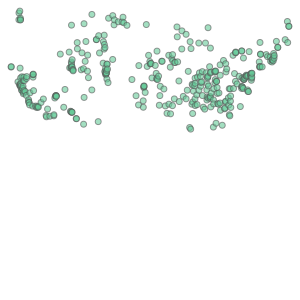

In [347]:
above_average_union = above_average_air.unary_union
above_average_union

In [348]:
powerplants['above_average_distance'] = powerplants.distance(above_average_union)
powerplants.head()

Plant_Code          Plant_Name     PrimSource  \
0           2        Bankhead Dam  hydroelectric   
1           3               Barry           coal   
2           4  Walter Bouldin Dam  hydroelectric   
3           7             Gadsden    natural gas   
4           8              Gorgas           coal   

                                       geometry  above_average_distance  \
0  POINT (-9724517.053678129 3909340.293418477)            18696.839771   
1  POINT (-9797261.780563243 3589737.144647198)            12217.541522   
2  POINT (-9604985.858007506 3794293.243440579)           168695.643884   
3  POINT (-9570225.679090364 3982829.598532216)            91864.009914   
4  POINT (-9706668.420482805 3933911.241182051)            48753.924463   

   below_average_distance  
0            23776.704635  
1           266462.880554  
2                0.000000  
3             4999.246358  
4            11960.898305

In [349]:
powerplants["above_average_distance"].mean()

129541.58996529605

In [354]:
below_average_air = airquality[airquality["Arithmetic Mean"] > average]
below_average_air.head()

State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
1           1           27         1           88101    1  33.284928   
3           1           49      1003           88101    1  34.288567   
4           1           55        10           88101    1  33.991494   
5           1           69         3           88101    1  31.224783   
6           1           73        23           88101    1  33.553056   

   Longitude  Datum            Parameter Name Sample Duration  \
1 -85.803608  NAD83  PM2.5 - Local Conditions         24 HOUR   
3 -85.969858  NAD83  PM2.5 - Local Conditions         24 HOUR   
4 -85.992647  NAD83  PM2.5 - Local Conditions         24 HOUR   
5 -85.390789  NAD83  PM2.5 - Local Conditions         24 HOUR   
6 -86.815000  WGS84  PM2.5 - Local Conditions         24 HOUR   

  Pollutant Standard Metric Used  \
1  PM25 24-hour 2012  Daily Mean   
3  PM25 24-hour 2012  Daily Mean   
4  PM25 24-hour 2012  Daily Mean   
5  PM25 24-hour 2012  Daily Mean   
6  PM25 24-hour 2012  Daily Mean   

                                         Method Name  Year  \
1  R & P Model 2025 PM-2.5 Sequential Air Sampler...  2017   
3  R & P Model 2025 PM-2.5 Sequential Air Sampler...  2017   
4  R & P Model 2025 PM-2.5 Sequential Air Sampler...  2017   
5  R & P Model 2025 PM-2.5 Sequential Air Sampler...  2017   
6  BGI Models PQ200-VSCC or PQ200A-VSCC - Gravime...  2017   

              Units of Measure Event Type  Observation Count  \
1  Micrograms/cubic meter (LC)  No Events                 27   
3  Micrograms/cubic meter (LC)  No Events                 30   
4  Micrograms/cubic meter (LC)  No Events                 30   
5  Micrograms/cubic meter (LC)  No Events                 29   
6  Micrograms/cubic meter (LC)  No Events                 29   

   Observation Percent Completeness Indicator  Valid Day Count  \
1                   22                      N               27   
3                   25                      N               30   
4                   25                      N               30   
5                   24                      N               29   
6                   24                      N               29   

   Required Day Count  Exceptional Data Count  Null Data Count  \
1                 122                       0                5   
3                 122                       0                0   
4                 122                       0                0   
5                 122                       0                1   
6                 122                       0                1   

   Primary Exceedance Count  Secondary Exceedance Count  \
1                       0.0                         0.0   
3                       0.0                         0.0   
4                       0.0                         0.0   
5                       1.0                         1.0   
6                       0.0                         0.0   

      Certification Indicator  Num Obs Below MDL  Arithmetic Mean  \
1  Certification not required                  0         8.851852   
3  Certification not required                  0         8.083333   
4  Certification not required                  0         9.073333   
5  Certification not required                  0         9.772414   
6  Certification not required                  0         8.975862   

   Arithmetic Standard Dev  1st Max Value  1st Max DateTime  2nd Max Value  \
1                 4.694708           19.0  2017-03-17 00:00           17.4   
3                 3.146436           14.8  2017-03-05 00:00           14.6   
4                 4.340660           17.5  2017-01-16 00:00           16.7   
5                 8.039363           47.7  2017-01-13 00:00           18.3   
6                 4.177205           18.3  2017-03-23 00:00           17.0   

   2nd Max DateTime  3rd Max Value  3rd Max DateTime  4th Max Value  \
1  2017-02-18 00:00           16.3  2017-02-21 00:00           15.0   
3  2017-02-18 00:00          

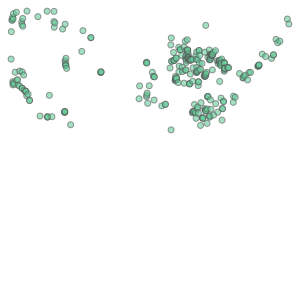

In [355]:
below_average_union = below_average_air.unary_union
below_average_union

In [356]:
powerplants['below_average_distance'] = powerplants.distance(below_average_union)
powerplants.head()

Plant_Code          Plant_Name     PrimSource  \
0           2        Bankhead Dam  hydroelectric   
1           3               Barry           coal   
2           4  Walter Bouldin Dam  hydroelectric   
3           7             Gadsden    natural gas   
4           8              Gorgas           coal   

                                       geometry  above_average_distance  \
0  POINT (-9724517.053678129 3909340.293418477)            18696.839771   
1  POINT (-9797261.780563243 3589737.144647198)            12217.541522   
2  POINT (-9604985.858007506 3794293.243440579)           168695.643884   
3  POINT (-9570225.679090364 3982829.598532216)            91864.009914   
4  POINT (-9706668.420482805 3933911.241182051)            48753.924463   

   below_average_distance  
0            39856.103035  
1           282549.967590  
2             2229.978938  
3            21083.423066  
4            28051.229448

In [357]:
powerplants["below_average_distance"].mean()

169355.09313647408

In [363]:
#The distance of powerplants from below average air stations is higher (??? doesn't seem right)
#Let's see what happens when we calculate the average air quality of stations that are closest to the powerplants 
#And calculate the air quality of those that are outside the 10 mile buffer

buffer_10miles_pp = powerplants.buffer(16093).unary_union

In [364]:
airquality[airquality.intersects(buffer_10miles_pp)]["Arithmetic Mean"].describe()

count    433.000000
mean       8.288933
std        2.576058
min        1.570000
25%        6.985556
50%        8.173333
75%        9.481818
max       25.050000
Name: Arithmetic Mean, dtype: float64

In [365]:
airquality[~airquality.intersects(buffer_10miles_pp)]["Arithmetic Mean"].describe()

count    440.000000
mean       7.705693
std        2.944366
min        1.678652
25%        6.021849
50%        7.609181
75%        8.986655
max       22.066667
Name: Arithmetic Mean, dtype: float64

In [ ]:
#The air quality is lower the closer we get to the powerplants